# ***CDC Diabetes - Binarna klasifikacija***

## Importovanje biblioteka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
import sklearn.pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif, mutual_info_classif

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline as make_imbpipeline

import warnings

pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None
warnings.filterwarnings("ignore", category=FutureWarning)

## Učitavanje podataka

In [2]:
dataset_url = "./dataset/diabetes/diabetes_012.csv"

data = pd.read_csv(dataset_url, sep=",")
data.head(10)

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000,1.000,1.000,1.000,40.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,5.000,18.000,15.000,1.000,0.000,9.000,4.000,3.000
1,0.000,0.000,0.000,0.000,25.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,3.000,0.000,0.000,0.000,0.000,7.000,6.000,1.000
2,0.000,1.000,1.000,1.000,28.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,5.000,30.000,30.000,1.000,0.000,9.000,4.000,8.000
3,0.000,1.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.000,0.000,0.000,0.000,11.000,3.000,6.000
4,0.000,1.000,1.000,1.000,24.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,3.000,0.000,0.000,0.000,11.000,5.000,4.000
5,0.000,1.000,1.000,1.000,25.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.000,2.000,0.000,1.000,10.000,6.000,8.000
6,0.000,1.000,0.000,1.000,30.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,14.000,0.000,0.000,9.000,6.000,7.000
7,0.000,1.000,1.000,1.000,25.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,3.000,0.000,0.000,1.000,0.000,11.000,4.000,4.000
8,2.000,1.000,1.000,1.000,30.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,5.000,30.000,30.000,1.000,0.000,9.000,5.000,1.000
9,0.000,0.000,0.000,1.000,24.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,2.000,0.000,0.000,0.000,1.000,8.000,4.000,3.000


In [3]:
print(data.shape)

(253680, 22)


## Pretprocesiranje, vizuelizacija i deskriptivna analiza podataka

In [4]:
data["Diabetes"] = data["Diabetes"].apply(lambda x: 0 if x == 0 else 1 if (x == 1 or x == 2) else -1).astype("int8")

data.head(10)

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.000,1.000,1.000,40.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,5.000,18.000,15.000,1.000,0.000,9.000,4.000,3.000
1,0,0.000,0.000,0.000,25.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,3.000,0.000,0.000,0.000,0.000,7.000,6.000,1.000
2,0,1.000,1.000,1.000,28.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,5.000,30.000,30.000,1.000,0.000,9.000,4.000,8.000
3,0,1.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.000,0.000,0.000,0.000,11.000,3.000,6.000
4,0,1.000,1.000,1.000,24.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,3.000,0.000,0.000,0.000,11.000,5.000,4.000
5,0,1.000,1.000,1.000,25.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.000,2.000,0.000,1.000,10.000,6.000,8.000
6,0,1.000,0.000,1.000,30.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,14.000,0.000,0.000,9.000,6.000,7.000
7,0,1.000,1.000,1.000,25.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,3.000,0.000,0.000,1.000,0.000,11.000,4.000,4.000
8,1,1.000,1.000,1.000,30.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,5.000,30.000,30.000,1.000,0.000,9.000,5.000,1.000
9,0,0.000,0.000,1.000,24.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,2.000,0.000,0.000,0.000,1.000,8.000,4.000,3.000


In [5]:
data.drop_duplicates(inplace=True)
print(data.shape)

(229712, 22)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229712 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              229712 non-null  int8   
 1   HighBP                229712 non-null  float64
 2   HighChol              229712 non-null  float64
 3   CholCheck             229712 non-null  float64
 4   BMI                   229712 non-null  float64
 5   Smoker                229712 non-null  float64
 6   Stroke                229712 non-null  float64
 7   HeartDiseaseorAttack  229712 non-null  float64
 8   PhysActivity          229712 non-null  float64
 9   Fruits                229712 non-null  float64
 10  Veggies               229712 non-null  float64
 11  HvyAlcoholConsump     229712 non-null  float64
 12  AnyHealthcare         229712 non-null  float64
 13  NoDocbcCost           229712 non-null  float64
 14  GenHlth               229712 non-null  float64
 15  MentH

### Menjamo tip binarnih atributa iz float64 u int8

In [7]:
binary_attributes = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Sex"]
data[binary_attributes] = data[binary_attributes].astype("int8")

categorical_attributes = ["GenHlth", "Education", "Income", "Age"]
data[categorical_attributes] = data[categorical_attributes].astype("int32")

data[["MentHlth", "PhysHlth"]] = data[["MentHlth", "PhysHlth"]].astype("int32")

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229712 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              229712 non-null  int8   
 1   HighBP                229712 non-null  int8   
 2   HighChol              229712 non-null  int8   
 3   CholCheck             229712 non-null  int8   
 4   BMI                   229712 non-null  float64
 5   Smoker                229712 non-null  int8   
 6   Stroke                229712 non-null  int8   
 7   HeartDiseaseorAttack  229712 non-null  int8   
 8   PhysActivity          229712 non-null  int8   
 9   Fruits                229712 non-null  int8   
 10  Veggies               229712 non-null  int8   
 11  HvyAlcoholConsump     229712 non-null  int8   
 12  AnyHealthcare         229712 non-null  int8   
 13  NoDocbcCost           229712 non-null  int8   
 14  GenHlth               229712 non-null  int32  
 15  MentH

In [8]:
data.describe(include=['int32', 'float64'])

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,229712.000,229712.000,229712.000,229712.000,229712.000,229712.000,229712.000
mean,28.686,2.601,3.506,4.676,8.086,4.980,5.890
std,6.787,1.065,7.715,9.047,3.094,0.993,2.093
min,12.000,1.000,0.000,0.000,1.000,1.000,1.000
25%,24.000,2.000,0.000,0.000,6.000,4.000,5.000
50%,27.000,3.000,0.000,0.000,8.000,5.000,6.000
75%,32.000,3.000,2.000,4.000,10.000,6.000,8.000
max,98.000,5.000,30.000,30.000,13.000,6.000,8.000


In [9]:
#Pravimo kopiju dataseta za potrebe vizuelizacije

_data = data.copy(deep=True)

In [10]:
def plot_hists_for_dataset(dataset):
    sns.set(font_scale=2)
    fig, ax = plt.subplots(math.ceil(len(dataset.columns) / 4), 4, figsize=(48, 42))
    ax = ax.flat

    for index, col in enumerate(dataset.columns):
        sns.histplot(dataset, x=col, ax=ax[index], bins=10)

    plt.delaxes(ax[-2])
    plt.delaxes(ax[-1])

    fig.tight_layout()
    sns.set(font_scale=1)

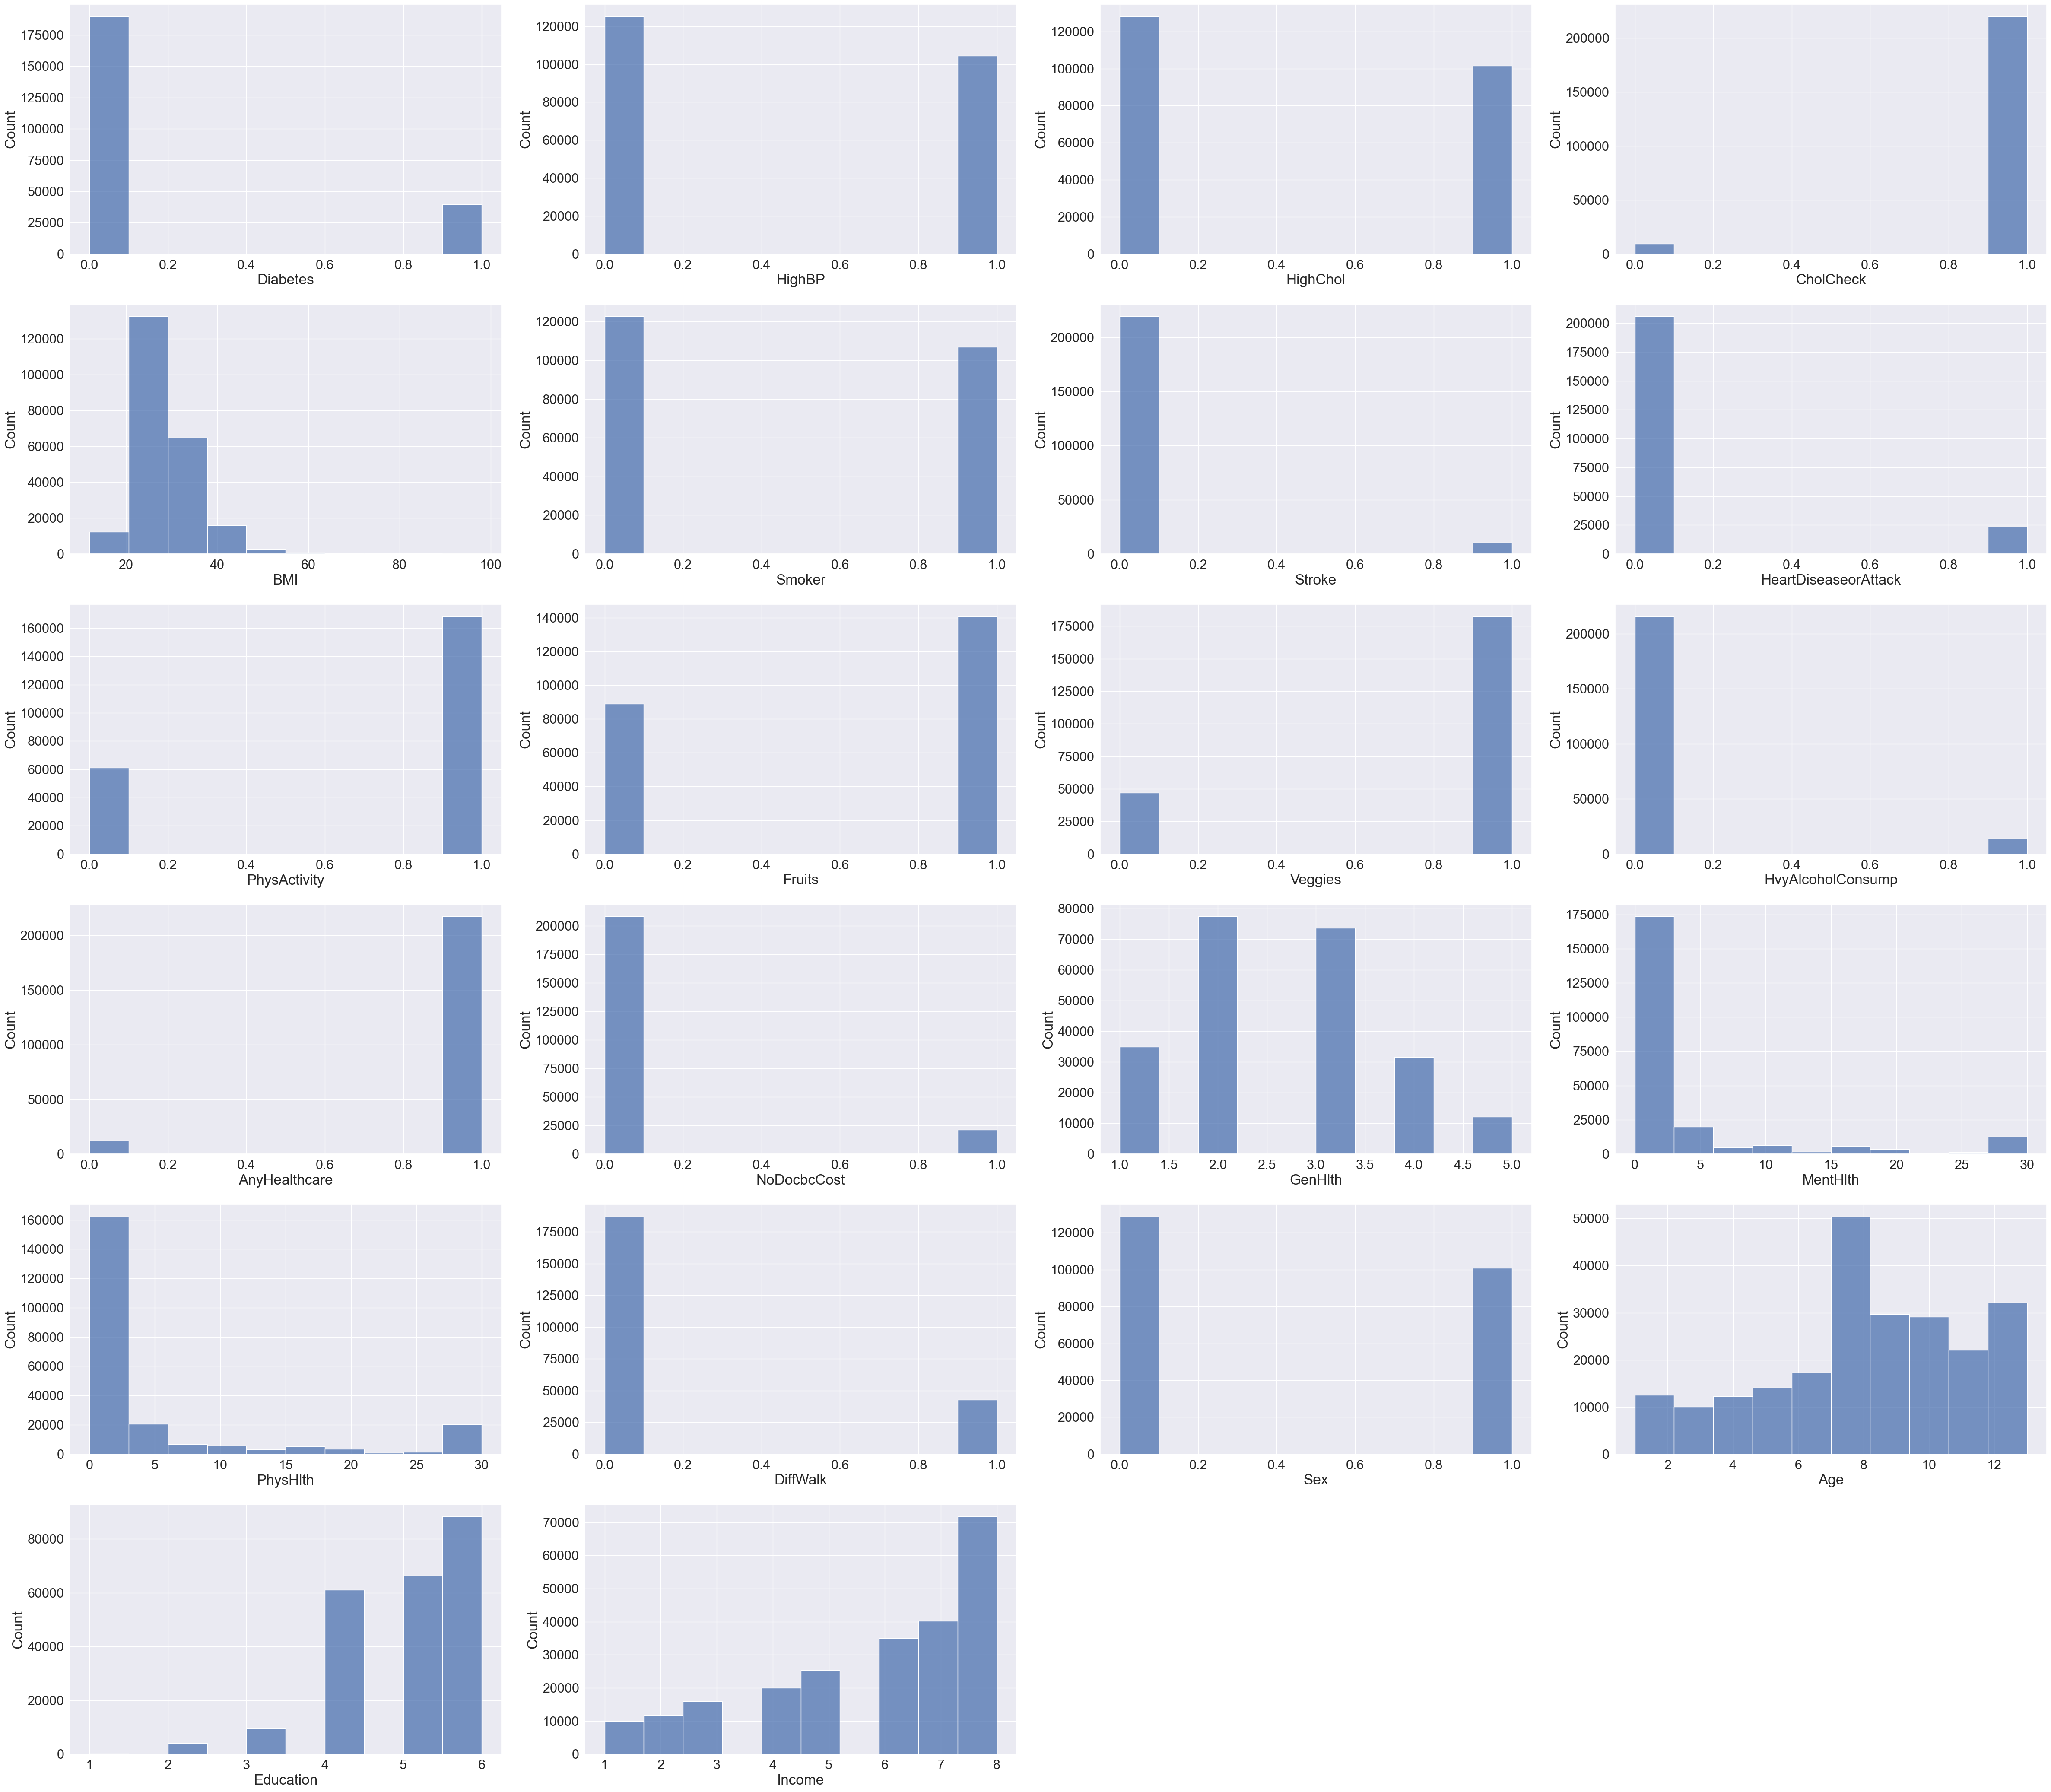

In [11]:
plot_hists_for_dataset(dataset=_data)

Dataset ***nije balansiran***. Mnogo vise primeraka je klase 0.

In [12]:
_data["Diabetes"].value_counts()

Diabetes
0    190055
1     39657
Name: count, dtype: int64

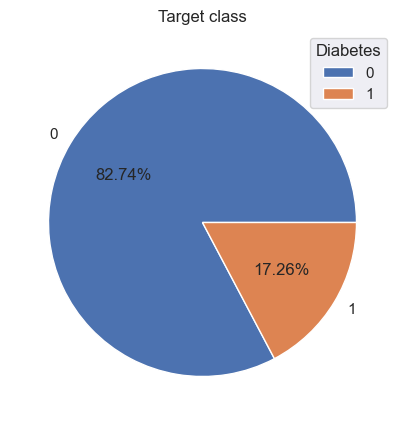

In [13]:
_data["Diabetes"].value_counts().plot(kind="pie", legend=True, autopct="%.2f%%", figsize=(5, 5))

plt.title("Target class")
plt.ylabel(None)
plt.legend(title="Diabetes", loc="upper right")

<Axes: >

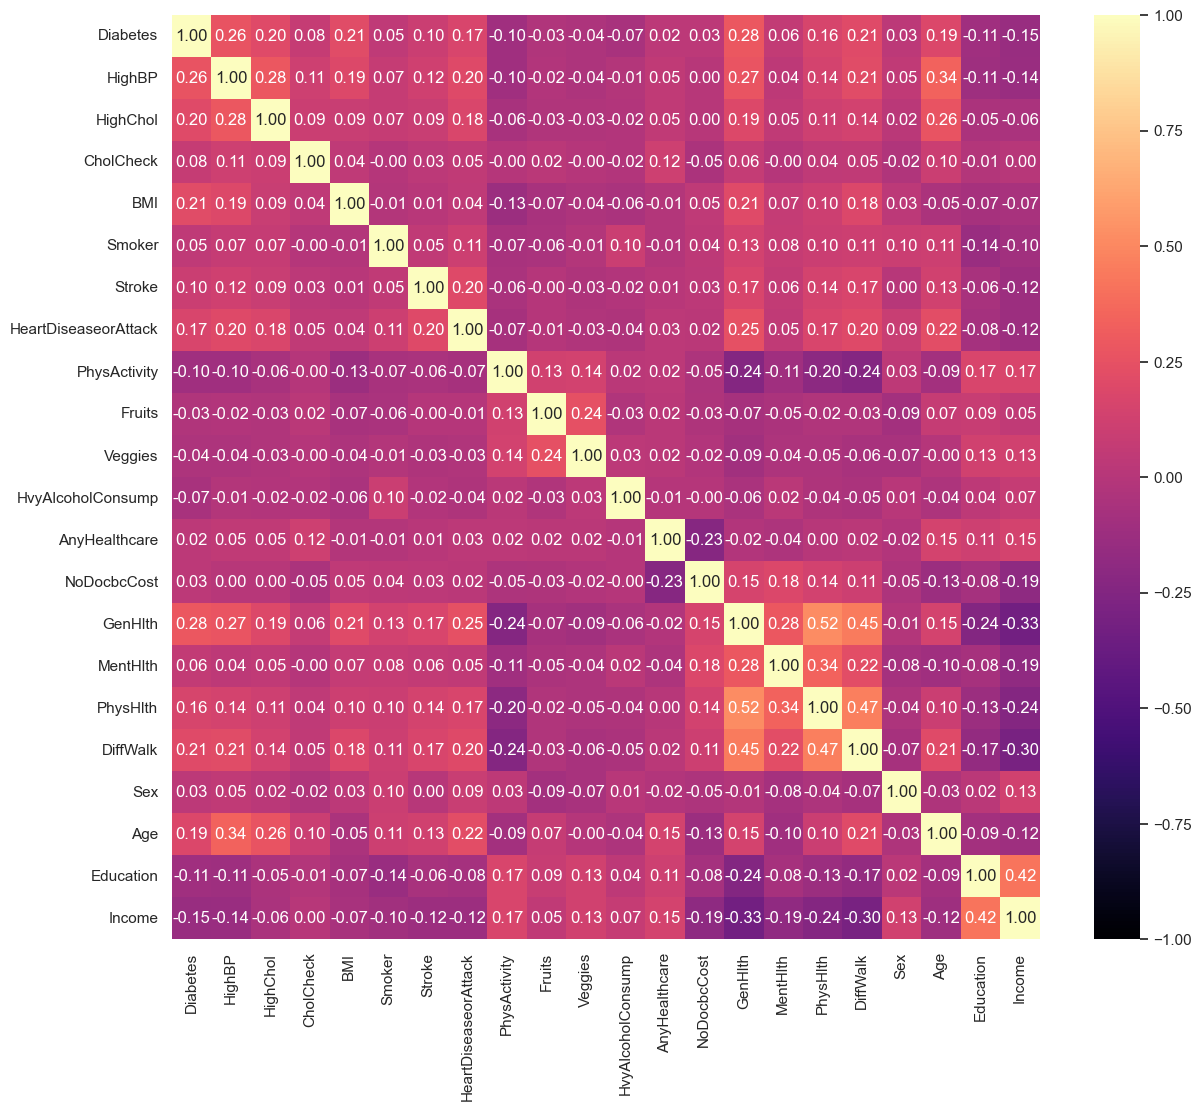

In [14]:
plt.figure(figsize=(14, 12))

sns.heatmap(_data.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cbar=True, cmap="magma")

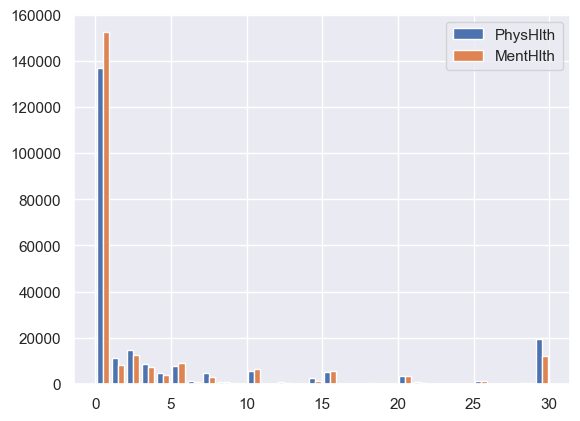

In [15]:
plt.hist(_data[["PhysHlth", "MentHlth"]], label=['PhysHlth', 'MentHlth'], bins=30)
plt.legend()

- Iako su **MentHlth** i **PhysHlth** slični atributi, njihova ne tako visoka korelacija nas sprečava da obrišemo jedan od njih. Ovi rezultati mogu biti od interesa kada radimo ***Feature Selection***.

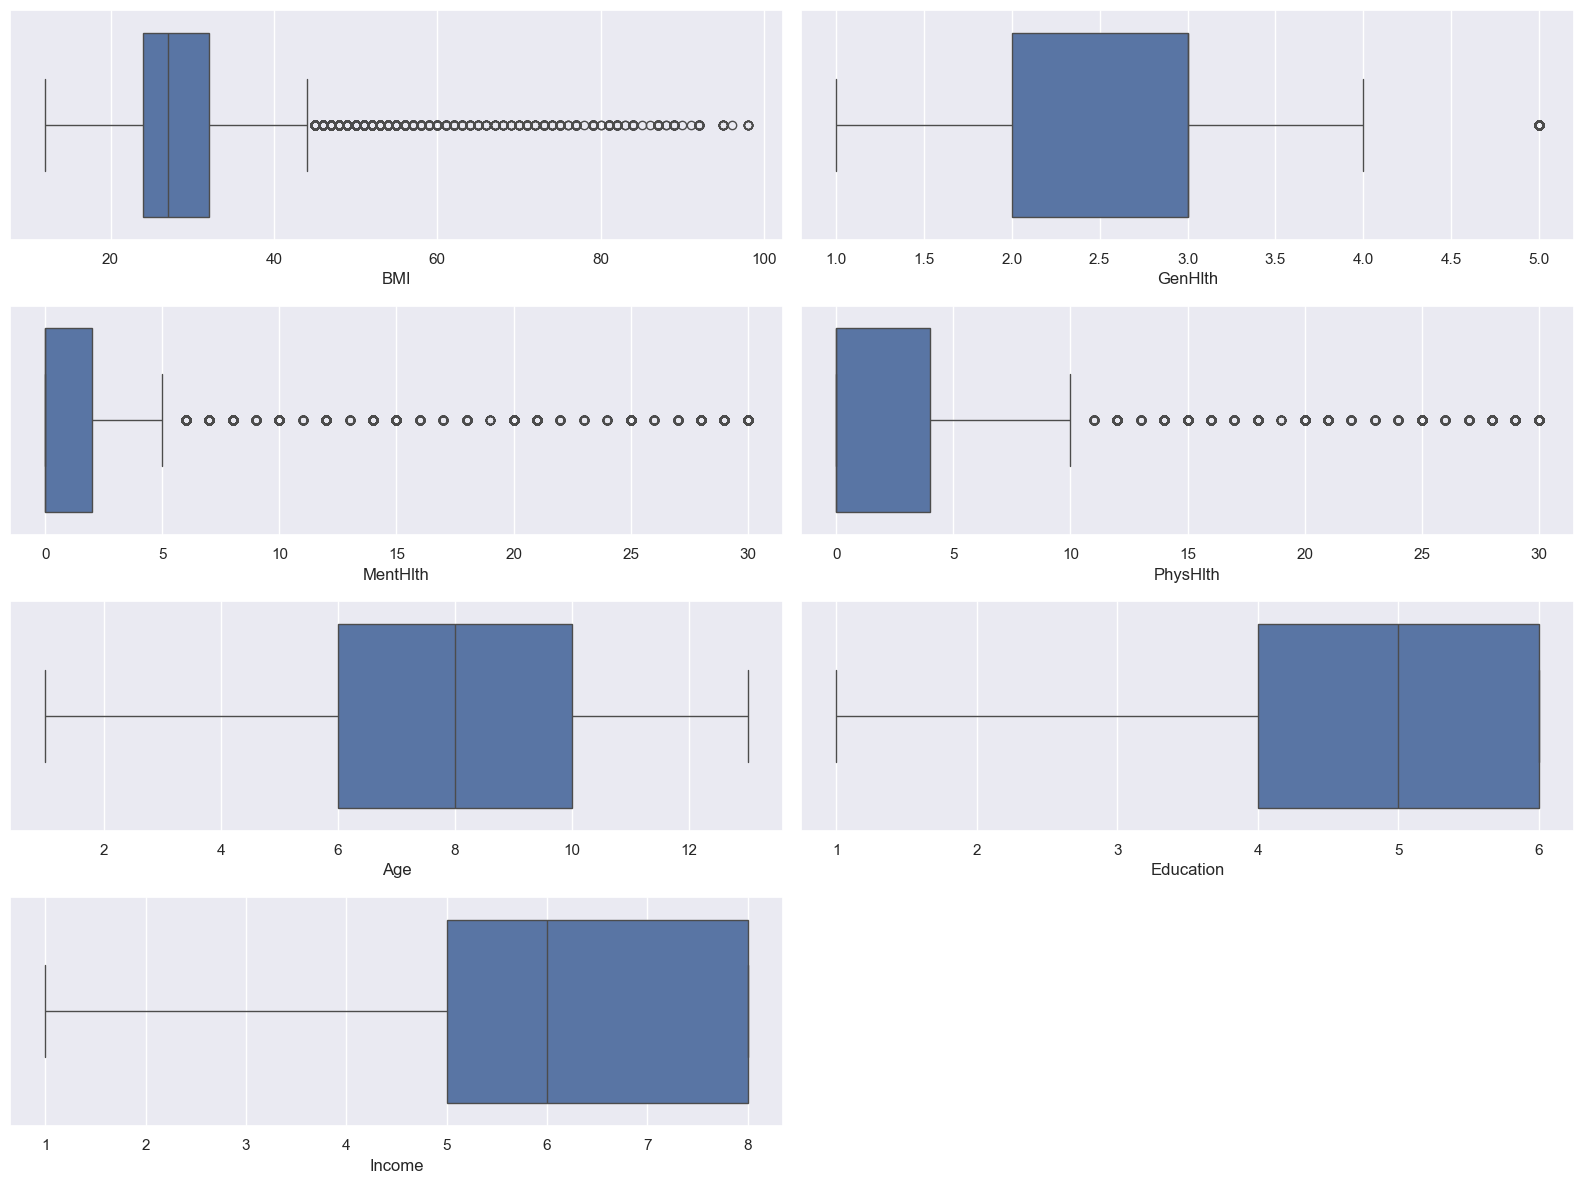

In [16]:
non_binary_attr = _data.select_dtypes(include=["float64", "int32"]).columns
fig, ax = plt.subplots(math.ceil(len(non_binary_attr) / 2), 2, figsize=(16, 12))
ax = ax.flat
                       
for i, attr in enumerate(non_binary_attr):
    sns.boxplot(x=_data[attr], ax=ax[i])

fig.delaxes(ax[-1])
fig.tight_layout()

**BMI** atribut je kontinualan, transformišemo njegovu raspodelu tako da bude približno normalna

In [17]:
print(_data["BMI"].skew())

2.063836972144859


<Axes: xlabel='BMI', ylabel='Count'>

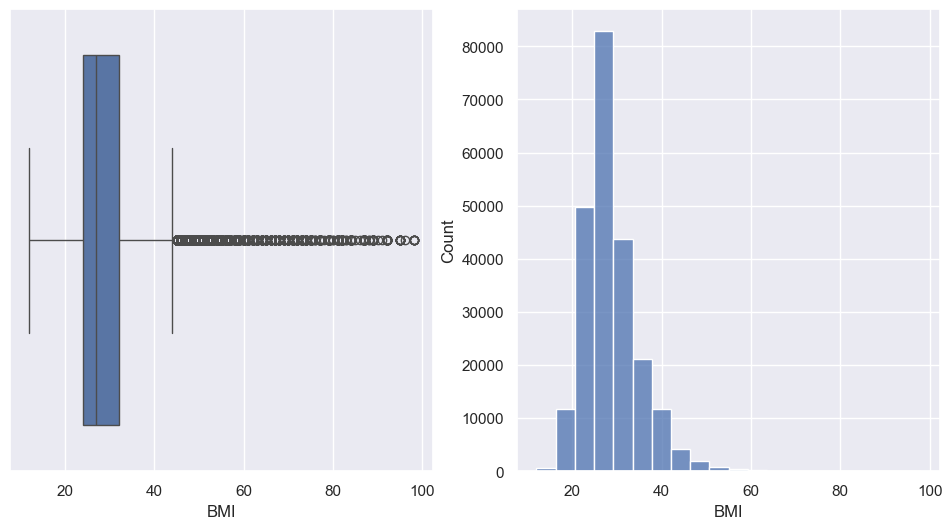

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=_data["BMI"], ax=ax[0])
sns.histplot(x=_data["BMI"], ax=ax[1], bins=20)

In [19]:
_data[(_data["BMI"] > 80.) | (_data["BMI"] < 11.5)]["BMI"].count()

279

In [20]:
def remove_bmi_errors(dataset):
    bmi_error_indicies = dataset[(dataset["BMI"] > 80.) | (dataset["BMI"] < 11.5)].index
    dataset.drop(bmi_error_indicies, axis=0, inplace=True)
    return dataset

_data = remove_bmi_errors(_data)

In [21]:
_data["transformed_bmi"] = _data["BMI"].apply(lambda bmi: np.log(bmi))

In [22]:
print(_data["transformed_bmi"].skew())

0.5035365358152916


<Axes: xlabel='transformed_bmi', ylabel='Count'>

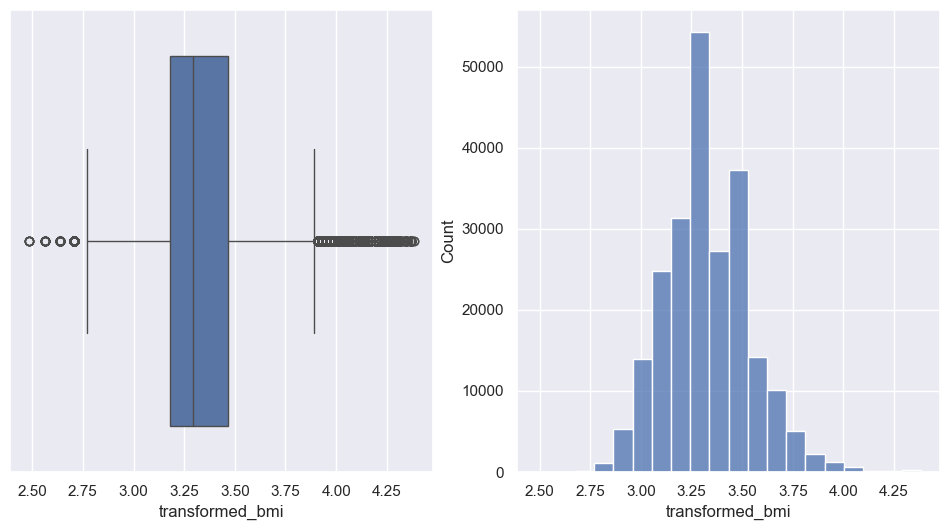

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=_data["transformed_bmi"], ax=ax[0])
sns.histplot(x=_data["transformed_bmi"], ax=ax[1], bins=20)

Probaćemo da grupišemo atribute **MentHlth** i **PhysHlth** u tri grupe, kako bismo smanjili broj "outlier-a" (ovo nisu outlier-i u pravom smislu te reči, ali zbog prirode ovih atributa i njihovog uticaj na dijabetes, probaćemo da ih predstavimo na način koji bi potencijalno dao bolje rezultate u predikciji ove bolesti).

- 0 - normalno
- 1 - umereno
- 2 - loše
- 4 - veoma loše

In [24]:
_data["bucket_MentHlth"] = pd.cut(_data["MentHlth"], [0, 7, 14, 21, 30], right=True, include_lowest=True, labels=[0, 1, 2, 3]).astype("int32")
_data["bucket_PhysHlth"] = pd.cut(_data["PhysHlth"], [0, 7, 14, 21, 30], right=True, include_lowest=True, labels=[0, 1, 2, 3]).astype("int32")

<Axes: xlabel='bucket_MentHlth', ylabel='Count'>

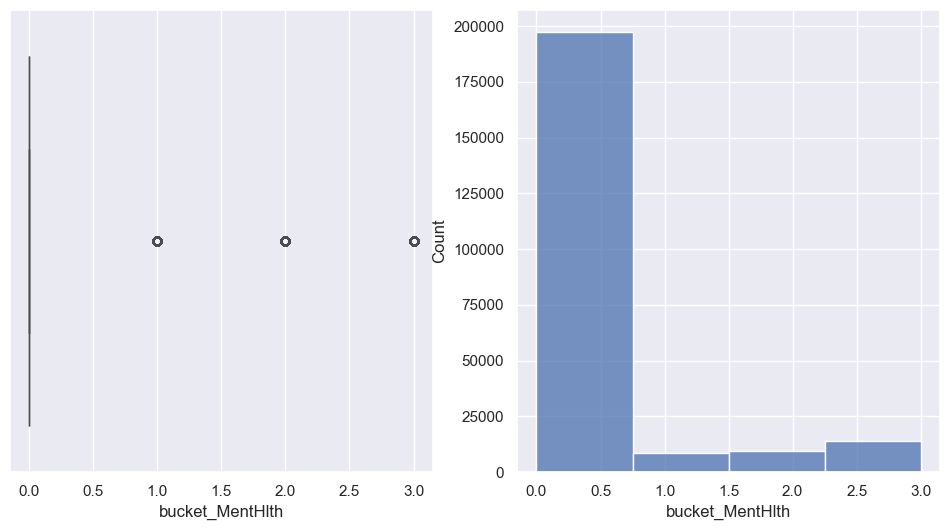

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=_data["bucket_MentHlth"], ax=ax[0])
sns.histplot(x=_data["bucket_MentHlth"], ax=ax[1], bins=4)

<Axes: xlabel='bucket_PhysHlth', ylabel='Count'>

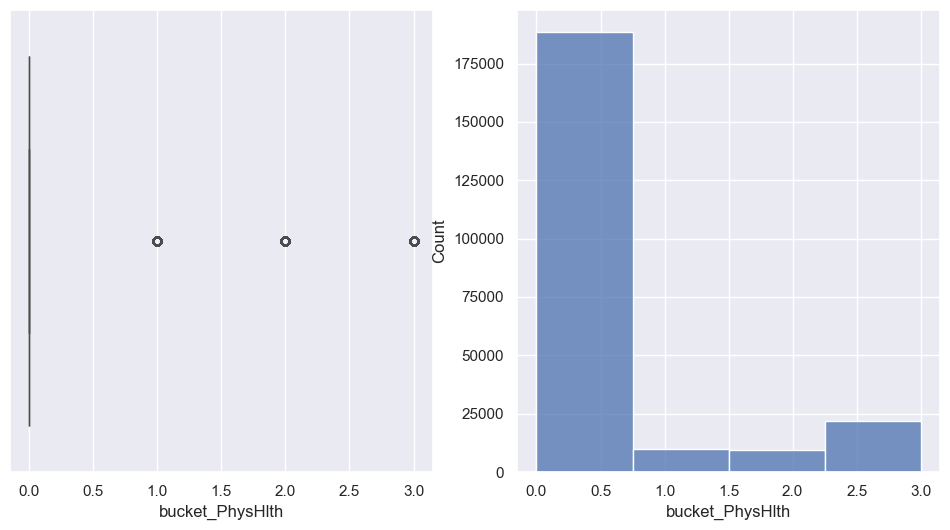

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=_data["bucket_PhysHlth"], ax=ax[0])
sns.histplot(x=_data["bucket_PhysHlth"], ax=ax[1], bins=4)

### Vizuelizacija nekih atributa u odnosu na *target*

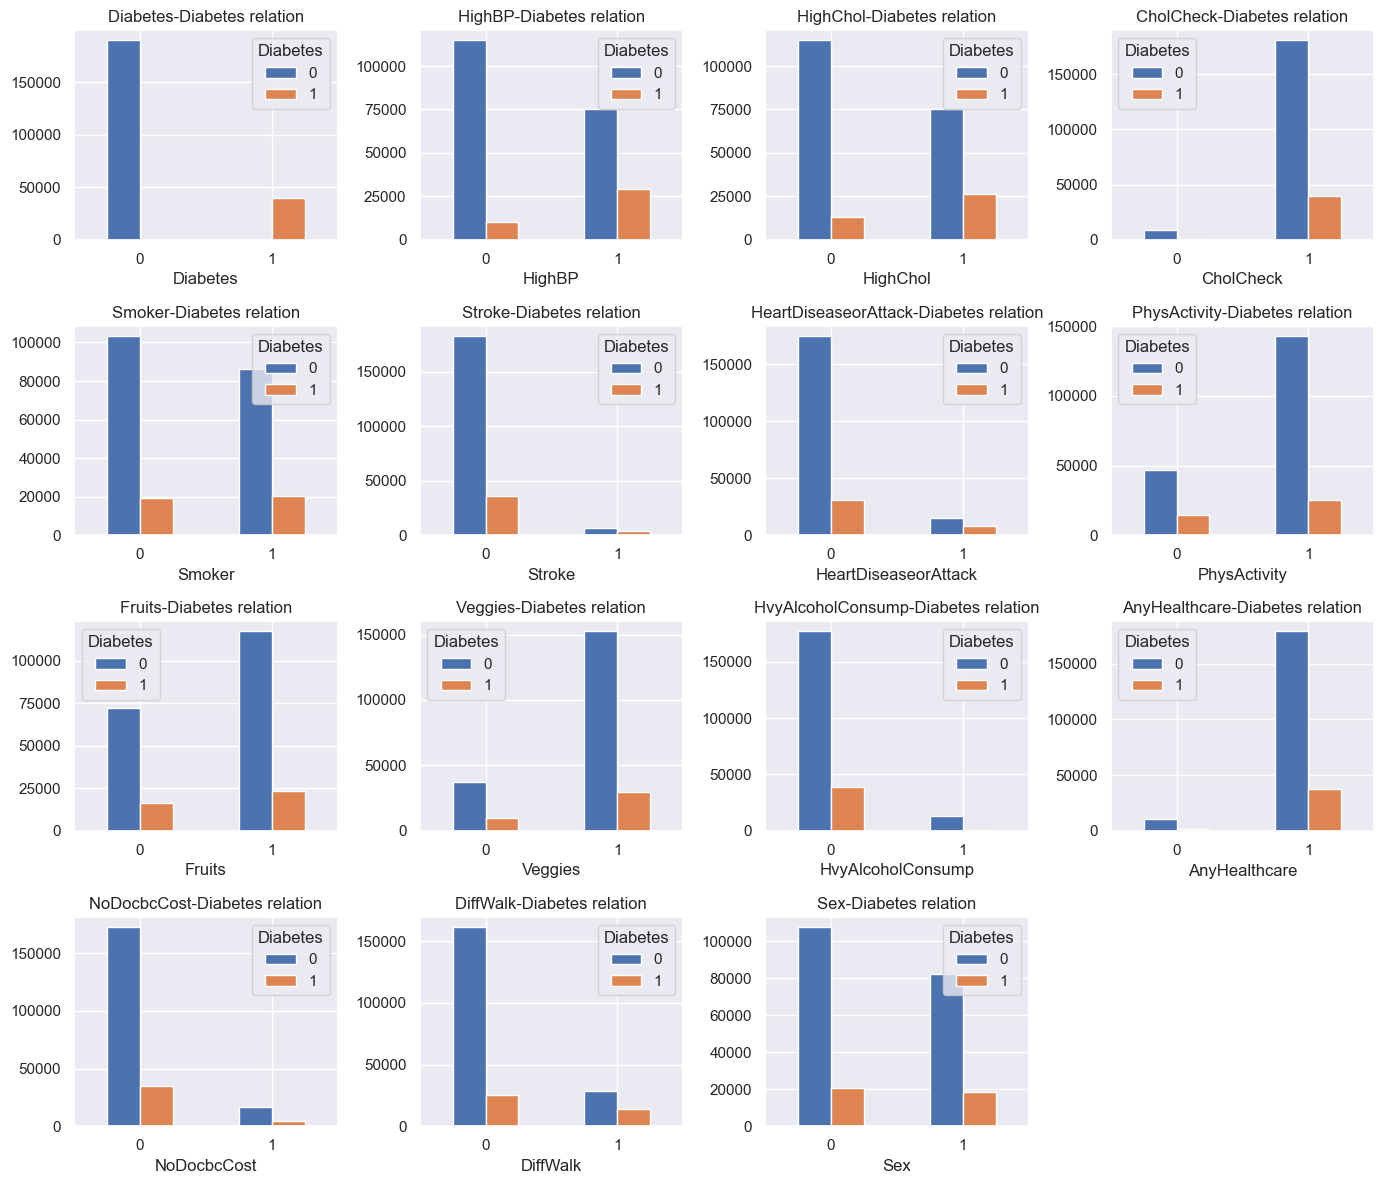

In [27]:
binary_attr = _data.select_dtypes(include=["int8"]).columns
fig, ax = plt.subplots(math.ceil(len(binary_attr) / 4), 4, figsize=(14, 12))
ax = ax.flat

for i, attr in enumerate(binary_attr):
    pd.crosstab(_data[attr], _data["Diabetes"]).plot(kind="bar", ax=ax[i], rot=0, title=f"{attr}-Diabetes relation")

fig.delaxes(ax[-1])
fig.tight_layout()

Attributi **HighBP**, **HighChol**, **DiffWalk** deluju kao dobri indikatori za diabetes.

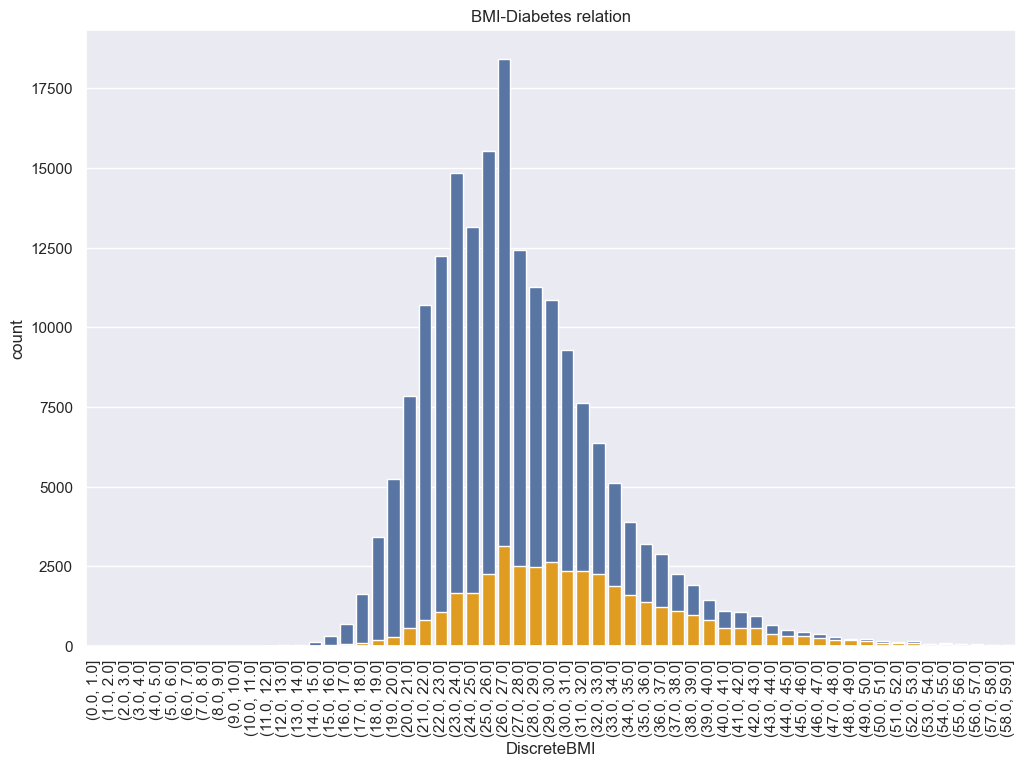

In [28]:
#bins = [0, 18.5, 25, 30, float('inf')]
bins = np.arange(0., 60., 1.)
discretized_BMI = pd.cut(x=_data["BMI"].astype(float), bins=bins)
_data["DiscreteBMI"] = discretized_BMI

plt.figure(figsize=(12, 8))
sns.countplot(x=_data[_data["Diabetes"] == 0]["DiscreteBMI"])
sns.countplot(x=_data[_data["Diabetes"] == 1]["DiscreteBMI"], color="orange")
plt.xticks(rotation=90)
plt.title("BMI-Diabetes relation")

_data.drop(["DiscreteBMI"], axis=1, inplace=True)

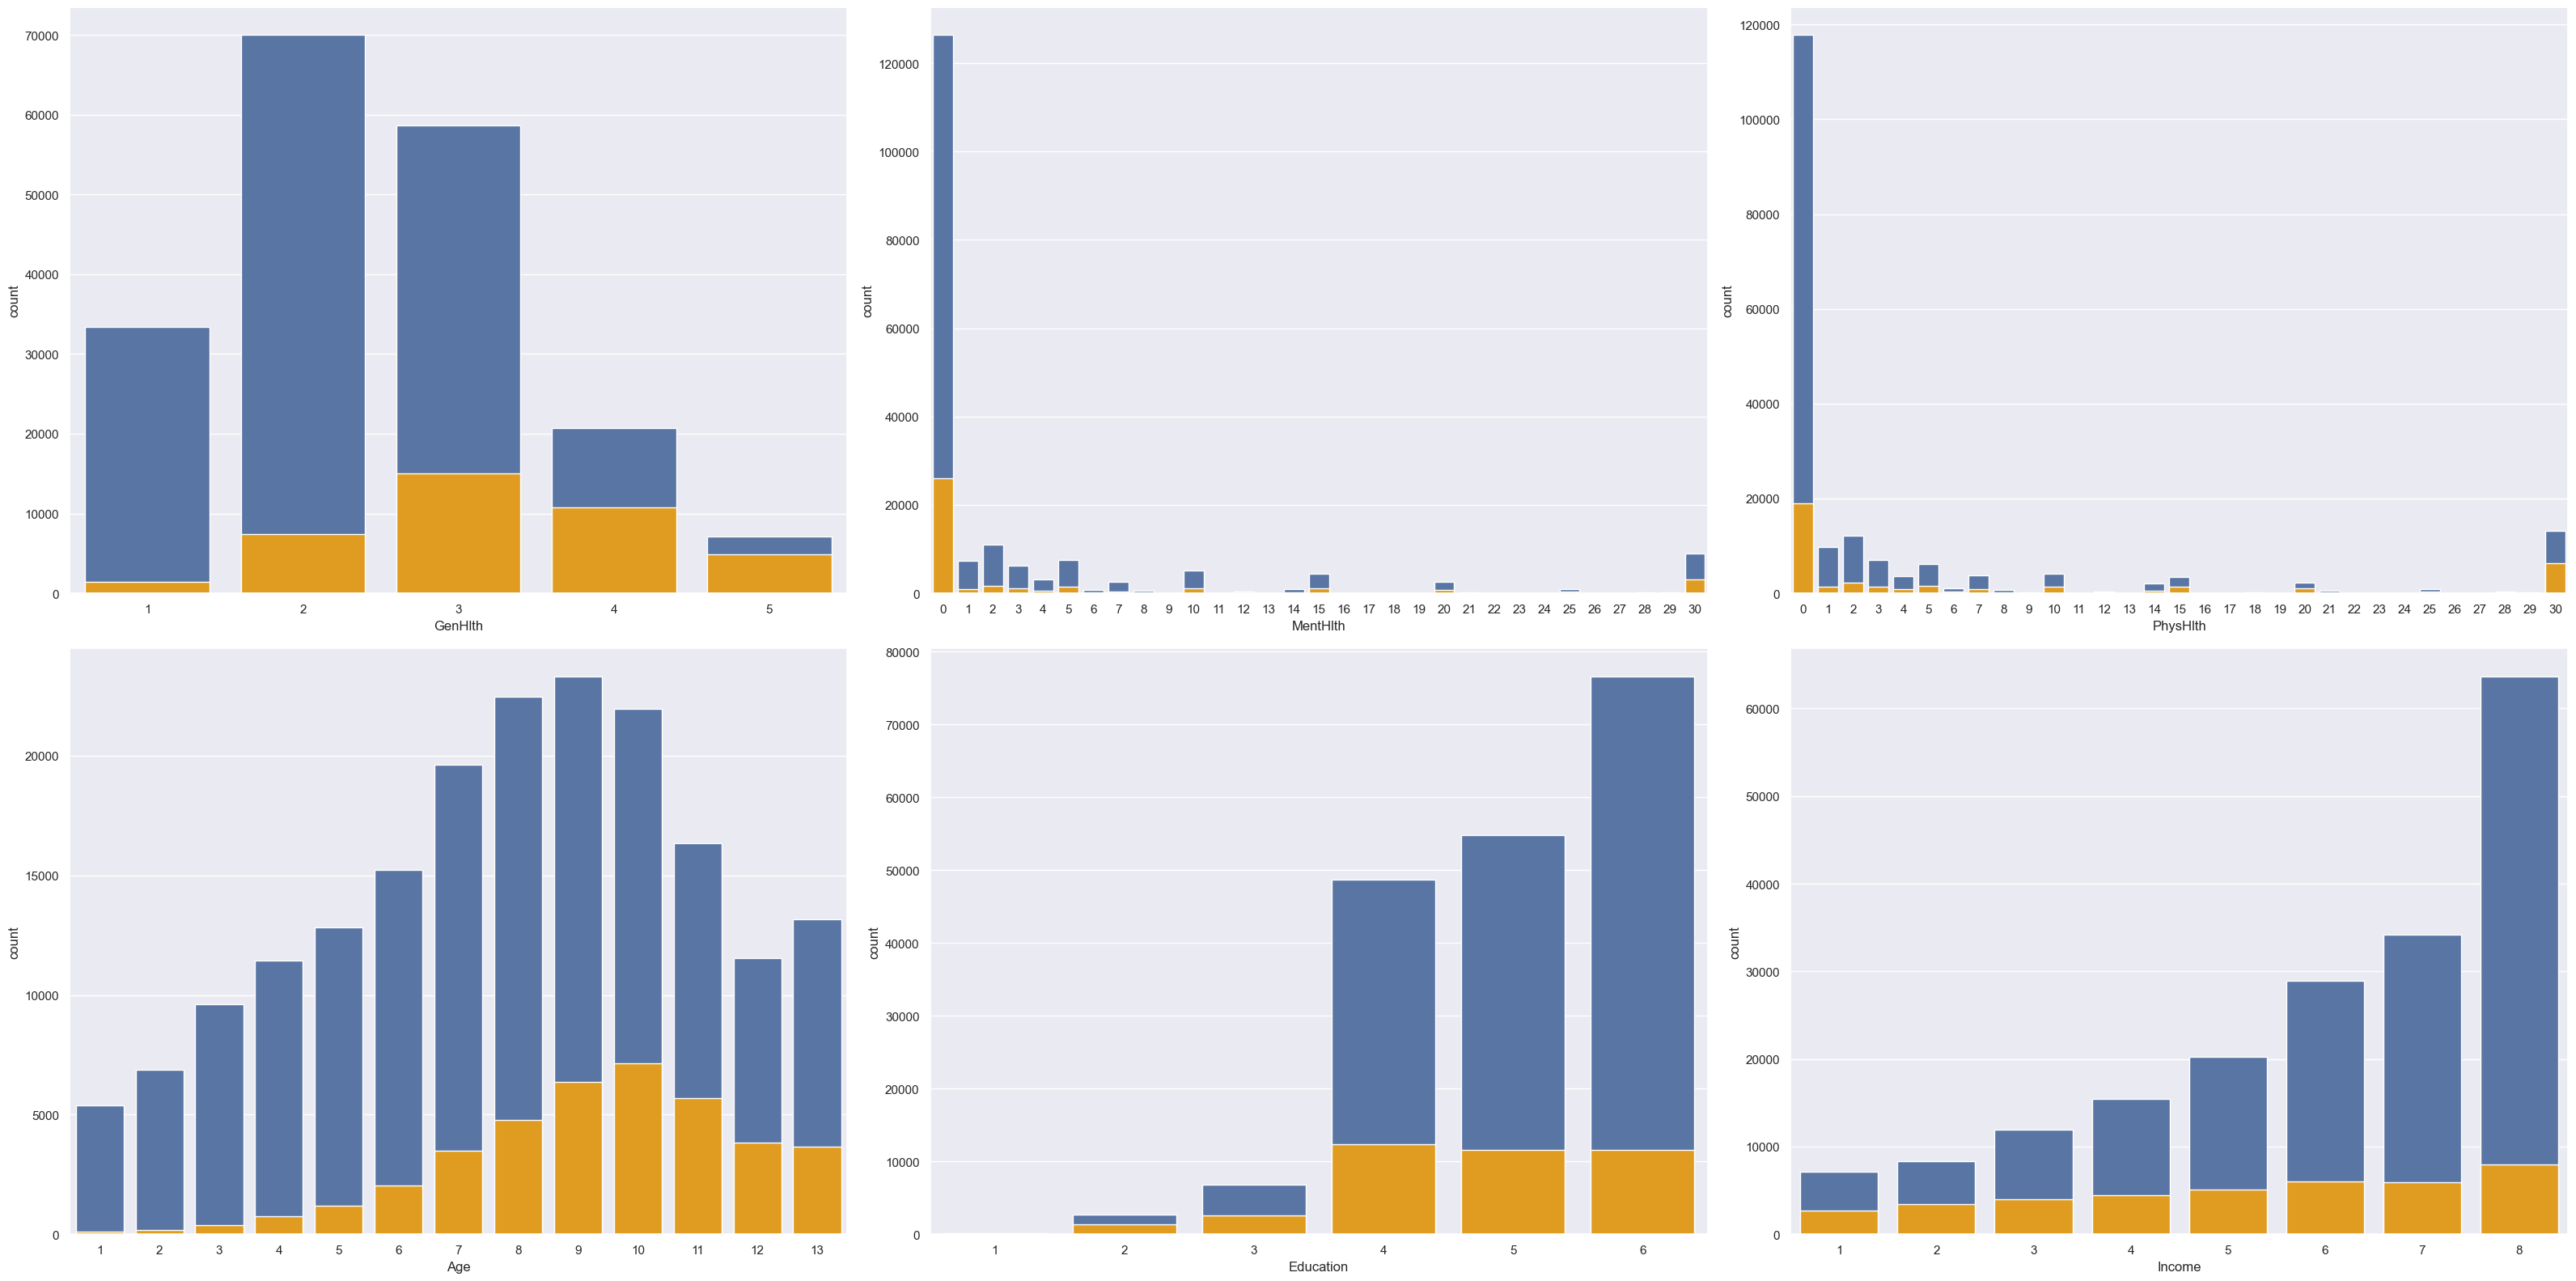

In [29]:
columns = ["GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]
fig, ax = plt.subplots(2, math.ceil(len(columns) / 2), figsize=(32, 16))
ax = ax.flat

for i, col in enumerate(columns):
    sns.countplot(x=_data[_data["Diabetes"] == 0][col], ax=ax[i])
    sns.countplot(x=_data[_data["Diabetes"] == 1][col], color="orange", ax=ax[i])

fig.tight_layout()

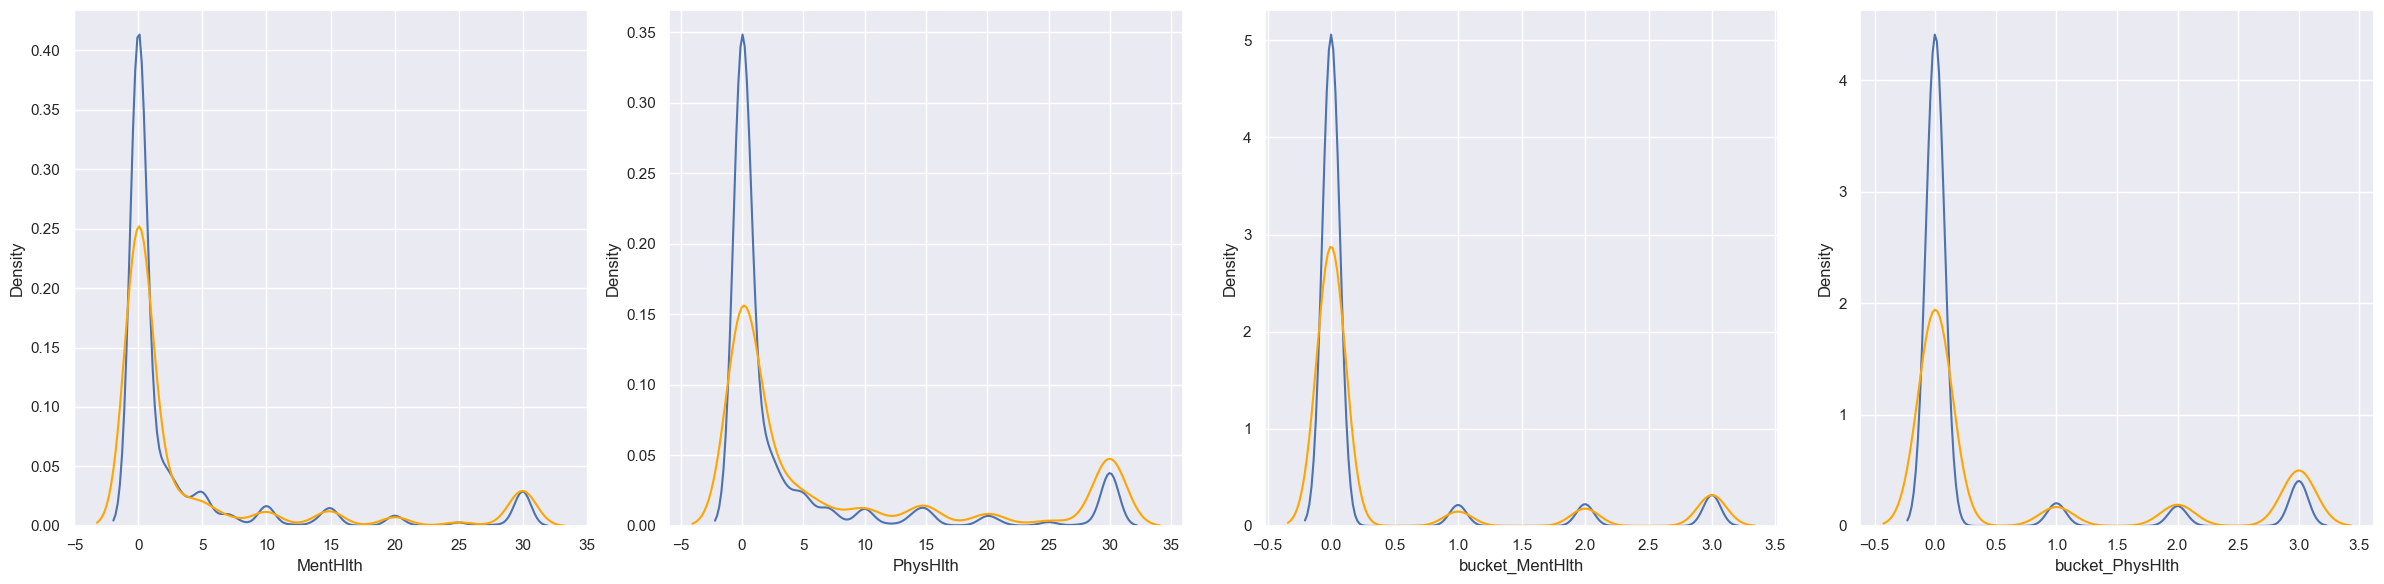

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

for i, col in enumerate(["MentHlth", "PhysHlth", "bucket_MentHlth", "bucket_PhysHlth"]):
    sns.kdeplot(x=_data[_data["Diabetes"] == 0][col], ax=ax[i])
    sns.kdeplot(x=_data[_data["Diabetes"] == 1][col], color="orange", ax=ax[i])

fig.tight_layout()

Zaključujemo da su atributi **GenHlth, MentHlth, PhysHlth, HighBP, HighChol** mogu biti značajni za detekciju dijabetesa. Takođe, dijabetes je prisutniji kod starijih ljudi i kod ljudi sa manjim godišnjim primanjima. Potvrdicemo ova tvrđenja analizom u nastavku.

In [31]:
cat_attr = binary_attributes + ["Age", "Income", "Education", "GenHlth", "bucket_MentHlth", "bucket_PhysHlth"]

chi2_res = SelectKBest(chi2, k="all").fit(_data[cat_attr], _data["Diabetes"])
chi2_stat_table = pd.DataFrame(chi2_res.scores_).set_index(chi2_res.feature_names_in_).sort_values(by=[0], ascending=False)
display(chi2_stat_table)

,0
bucket_PhysHlth,12192.779
Age,9312.804
HighBP,8472.318
DiffWalk,8127.286
GenHlth,7983.018
HeartDiseaseorAttack,5749.451
HighChol,5350.324
Income,3746.309
Stroke,2099.223
bucket_MentHlth,1986.927


In [32]:
num_attr = ["MentHlth", "PhysHlth", "BMI", "transformed_bmi"]

anova = SelectKBest(f_classif, k="all").fit(_data[num_attr], _data["Diabetes"])
anova_table = pd.DataFrame(anova.scores_).set_index(anova.feature_names_in_).sort_values(by=[0], ascending=False)
display(anova_table)

,0
transformed_bmi,12399.119
BMI,11861.335
PhysHlth,5947.492
MentHlth,801.439


In [33]:
mi = SelectKBest(mutual_info_classif, k="all").fit(_data, _data["Diabetes"])
mi_table = pd.DataFrame(mi.scores_).set_index(mi.feature_names_in_).sort_values(by=[0], ascending=False)
display(mi_table)

,0
Diabetes,0.464
HighBP,0.053
GenHlth,0.051
AnyHealthcare,0.046
CholCheck,0.044
PhysActivity,0.043
HighChol,0.039
Veggies,0.036
Fruits,0.033
BMI,0.029


Možemo da primetimo da naše grupisanje atributa **MentHlth** i **PhysHlth** nije mnogo pomoglo, tj. ovakav atribut ima manji uticaj na oznaku klase nego njihove "sirove" vrednosti.

## Treniranje modela logističke regresije - *referentni model*

Pre treniranja referentnog modela nećemo koristiti tehnike resampling-a, niti bilo kakvu tranformaciju i selekciju atributa.

### Train-test split (bez korišćenja over i undersampling-a)

In [34]:
_data = data.copy(deep=True)

In [35]:
#stratifikovano uzorkovanje, kako bi imali isti odnos klasa u test setu kao i u originalnom

train__data, test__data = train_test_split(_data, test_size=0.2, stratify=_data["Diabetes"], random_state=42)
train__data["Diabetes"].value_counts()

Diabetes
0    152044
1     31725
Name: count, dtype: int64

In [36]:
test__data["Diabetes"].value_counts()

Diabetes
0    38011
1     7932
Name: count, dtype: int64

### Testiranje modela Logističke regresije, bez prethodnog sređivanja podataka ili balansiranja klasa

In [37]:
X_train = train__data.iloc[:, 1:]
y_train = train__data.iloc[:, 0]

X_test = test__data.iloc[:, 1:]
y_test = test__data.iloc[:, 0]

In [38]:
logreg = LogisticRegression(max_iter=600, random_state=42)
logreg = logreg.fit(X_train, y_train)

U slučaju nebalansiranog dataset-a kakav imamo, **Accuracy** nije najbolja mera modela, već koristimo mere kao što su **Precision** i  **Recall**

In [39]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

y_train_pred_proba = logreg.predict_proba(X_train)[:, 1]
y_test_pred_proba = logreg.predict_proba(X_test)[:, 1]

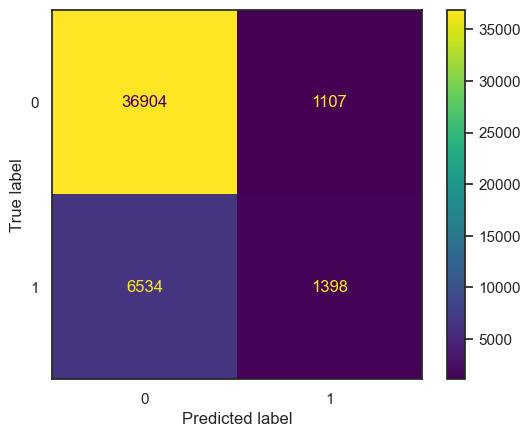

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
sns.set_style("white")
conf_mat_display.plot()

***Training set report***

In [41]:
print(metrics.classification_report(y_train, y_train_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8498    0.9700    0.9059    152044
           1     0.5535    0.1782    0.2696     31725

    accuracy                         0.8333    183769
   macro avg     0.7016    0.5741    0.5878    183769
weighted avg     0.7986    0.8333    0.7961    183769



In [42]:
print(metrics.roc_auc_score(y_train, y_train_pred))

0.5740948269526475


***Test report***

In [43]:
print(metrics.classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8496    0.9709    0.9062     38011
           1     0.5581    0.1762    0.2679      7932

    accuracy                         0.8337     45943
   macro avg     0.7038    0.5736    0.5870     45943
weighted avg     0.7993    0.8337    0.7960     45943



In [44]:
print(metrics.roc_auc_score(y_test, y_test_pred))

0.5735624801818058


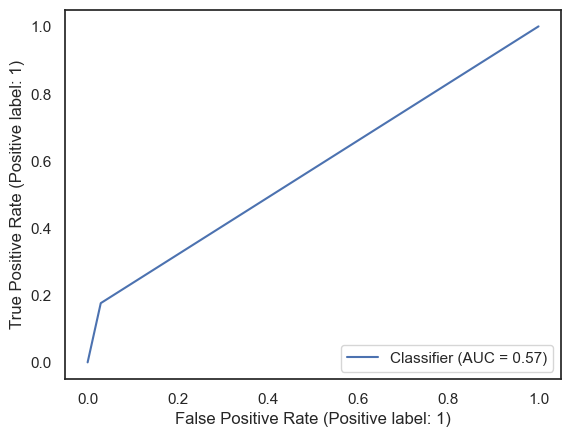

In [45]:
metrics.RocCurveDisplay.from_predictions(y_test, y_test_pred)

## Selekcija atributa - pomocne funkcije za izdvajanje podskupova

In [46]:
def filter_attributes(X, y, score_func, num_attrs=15):
    feature_selector = SelectKBest(score_func=score_func, k=num_attrs)
    feature_subset = feature_selector.fit(X, y).get_support()
    return X.columns[feature_subset]

In [47]:
feature_subset_chi2 = dict()
feature_subset_anova = dict()

for i in range(10, 22):
    best_attribures_chi2 = list(filter_attributes(X_train, y_train, chi2, num_attrs=i))
    feature_subset_chi2[i] = best_attribures_chi2

for i in range(10, 22):
    best_attribures_anova = list(filter_attributes(X_train, y_train, f_classif, num_attrs=i))
    feature_subset_anova[i] = best_attribures_anova

In [48]:
for i in feature_subset_chi2:
    print(feature_subset_chi2[i])

['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']
['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']
['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']
['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']
['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 

In [49]:
for i in feature_subset_anova:
    print(feature_subset_anova[i])

['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDise

## Definišemo pipeline za pretprocesiranje podataka

Pre treniranja transformišemo BMI tako da dobijemo približno normalnu raspodelu - kao što smo uradili kod vizuelizacije.

In [50]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
bmi_pipeline = sklearn.pipeline.make_pipeline(log_transformer, StandardScaler())

Ostale kolone standardizujemo.

In [51]:
num_pipeline = sklearn.pipeline.make_pipeline(StandardScaler())

In [68]:
preprocessing = ColumnTransformer([("num-transform", num_pipeline, make_column_selector(dtype_include=["int32"])),
                                   ("bmi-transform", bmi_pipeline, make_column_selector(pattern="BMI"))],
                                   remainder="passthrough")

## Cross-validacija za selekciju modela

In [53]:
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
scoring={"p": "precision", "r": "recall", "roc": "roc_auc", "pr": "average_precision", "acc": "accuracy", "loss": "neg_log_loss"}

In [54]:
cdc_data = data.copy(deep=True)

In [55]:
train__data, test__data = train_test_split(cdc_data, test_size=0.2, random_state=42, stratify=cdc_data["Diabetes"])

X_train = train__data.iloc[:, 1:]
y_train = train__data.iloc[:, 0]

X_test = test__data.iloc[:, 1:]
y_test = test__data.iloc[:, 0]

In [56]:
candidate_models = {
    "logreg": LogisticRegression(max_iter=600, random_state=42, n_jobs=-1),
    "sgd": SGDClassifier(loss="log_loss"),
    "knn": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "dtree": DecisionTreeClassifier(random_state=42),
    "gboost": GradientBoostingClassifier(random_state=42),
    "baggingc": BaggingClassifier(n_estimators=10, estimator=DecisionTreeClassifier(random_state=42), random_state=42, n_jobs=-1),
    "randomforest": RandomForestClassifier(random_state=42, n_jobs=-1)
}

In [57]:
def create_pipeline(model, *steps, resampled=False):
    if(resampled):
        return make_imbpipeline(*steps, model)
    else:
        return sklearn.pipeline.make_pipeline(*steps, model)

In [58]:
def run_cv(candidate_models, X, y, cv, scoring, *steps, return_train_score=True, resampled=False):
    X_c = X.copy(deep=True)
    y_c = y.copy(deep=True)
    results = dict()
    pipeline = None

    for model in candidate_models:        
        pipeline = create_pipeline(candidate_models[model], *steps, resampled=resampled)
        results[model] = cross_validate(pipeline, X_c, y_c, cv=cv, scoring=scoring, return_train_score=return_train_score, n_jobs=-1)
    
    return results

In [59]:
def print_results(results):
    res_df = pd.DataFrame()
    for model in results:
        model_res = results[model]
        for metrics in model_res:
            model_res[metrics] =  np.mean(model_res[metrics])
        res_df[model] = model_res
    display(res_df.T)

Probaćemo da testiramo različite modela nad podacima koji nisu oversamplovani, niti transformisani.

### Raw data

In [60]:
results_raw = run_cv(candidate_models, X_train, y_train, kf, scoring, preprocessing)

In [61]:
print_results(results_raw)

,fit_time,score_time,test_p,train_p,test_r,train_r,test_roc,train_roc,test_pr,train_pr,test_acc,train_acc,test_loss,train_loss
logreg,0.977,0.096,0.561,0.562,0.189,0.190,0.804,0.804,0.443,0.443,0.834,0.835,-0.371,-0.371
sgd,0.539,0.089,0.546,0.545,0.220,0.219,0.802,0.803,0.440,0.441,0.833,0.833,-0.374,-0.373
knn,0.129,40.398,0.435,0.684,0.249,0.395,0.711,0.891,0.317,0.566,0.815,0.864,-1.769,-0.276
dtree,0.810,0.083,0.306,1.000,0.342,0.971,0.590,1.000,0.219,0.999,0.753,0.995,-8.880,-0.007
gboost,19.240,0.238,0.579,0.585,0.205,0.207,0.810,0.813,0.461,0.467,0.837,0.838,-0.366,-0.365
baggingc,5.278,0.422,0.414,0.984,0.217,0.893,0.725,0.998,0.327,0.991,0.812,0.979,-1.156,-0.112
randomforest,16.570,1.501,0.495,0.995,0.204,0.976,0.774,1.000,0.390,1.000,0.827,0.995,-0.467,-0.102


Dobijeni rezultati nisu dobri, zbog toga ćemo probati da resamplujemo dataset kako bismo smanjili nebalansiranost klasa. Za resampling, u prvoj varijanti, koristimo ***SMOTEEN*** metodu biblioteke ***imblearn*** koja vrši resamplovanje tako što prvo odbacuje neke vrste dominantne klase, a zatim sintetiše primere nove instnce klase koja je u manjini. U drugoj varijanti, kombinujemo ***SMOTE*** sa ***RandomUndersamper***-om kako bismo uporedili rezultate.

In [60]:
def resample_data(X, y, undersampler=None, oversampler=None):
    X_rasampled, y_resampled = X.copy(deep=True), y.copy(deep=True)
    if undersampler:
        X_rasampled, y_resampled = undersampler.fit_resample(X_rasampled, y_resampled)
    if oversampler:
        X_rasampled, y_resampled = oversampler.fit_resample(X_rasampled, y_resampled)
    
    return X_rasampled, y_resampled

### SMOTE oversampling

In [ ]:
X_train_resampled, y_train_resampled = resample_data(X_train, y_train, oversampler=SMOTE(sampling_strategy=0.8, random_state=42, n_jobs=-1))

In [ ]:
print(y_train_resampled.value_counts())

Diabetes
0    152044
1    121635
Name: count, dtype: int64


In [ ]:
results_resampled = run_cv(candidate_models, X_train_resampled, y_train_resampled, kf, scoring, preprocessing)

In [ ]:
print_results(results_resampled)

,fit_time,score_time,test_p,train_p,test_r,train_r,test_roc,train_roc,test_pr,train_pr,test_acc,train_acc,test_loss,train_loss
logreg,1.518,0.138,0.696,0.696,0.671,0.671,0.800,0.800,0.738,0.738,0.723,0.723,-0.537,-0.537
sgd,0.801,0.131,0.693,0.694,0.672,0.672,0.799,0.799,0.736,0.736,0.722,0.722,-0.540,-0.540
knn,0.183,83.867,0.694,0.774,0.826,0.896,0.840,0.932,0.753,0.897,0.761,0.838,-1.771,-0.322
dtree,2.084,0.130,0.743,0.993,0.805,0.992,0.794,1.000,0.688,1.000,0.790,0.994,-7.363,-0.011
gboost,36.276,0.371,0.720,0.720,0.726,0.726,0.833,0.835,0.790,0.791,0.752,0.753,-0.502,-0.501
baggingc,10.295,0.638,0.821,0.987,0.811,0.982,0.910,0.999,0.881,0.998,0.837,0.986,-0.698,-0.108
randomforest,20.205,2.083,0.807,0.990,0.845,0.996,0.922,1.000,0.904,0.999,0.841,0.994,-0.386,-0.109


**SMOTE** nam je dao bolje rezultate, probaćemo i druge tehnike za resampling.

### SMOTENC

In [ ]:
categorical = list(X_train.select_dtypes(include=["int8"]).columns)

X_train_resampled, y_train_resampled = resample_data(X_train, y_train, oversampler=SMOTENC(sampling_strategy=0.8, categorical_features=categorical, n_jobs=-1))

In [ ]:
print(y_train_resampled.value_counts())

Diabetes
0    152044
1    121635
Name: count, dtype: int64


In [ ]:
results_resampled = run_cv(candidate_models, X_train_resampled, y_train_resampled, kf, scoring, preprocessing)

In [ ]:
print_results(results_resampled)

,fit_time,score_time,test_p,train_p,test_r,train_r,test_roc,train_roc,test_pr,train_pr,test_acc,train_acc,test_loss,train_loss
logreg,1.852,0.137,0.712,0.712,0.718,0.718,0.822,0.822,0.766,0.766,0.745,0.745,-0.513,-0.513
sgd,0.843,0.112,0.709,0.709,0.721,0.722,0.821,0.821,0.766,0.766,0.744,0.744,-0.514,-0.514
knn,0.181,84.017,0.706,0.780,0.854,0.911,0.857,0.941,0.775,0.911,0.777,0.846,-1.847,-0.304
dtree,2.053,0.131,0.755,0.995,0.802,0.991,0.800,1.000,0.697,1.000,0.796,0.994,-7.126,-0.010
gboost,38.018,0.344,0.747,0.748,0.747,0.748,0.858,0.859,0.823,0.824,0.775,0.776,-0.471,-0.470
baggingc,10.067,0.598,0.835,0.988,0.800,0.980,0.912,0.999,0.891,0.998,0.841,0.986,-0.738,-0.102
randomforest,21.278,1.927,0.820,0.991,0.839,0.995,0.925,1.000,0.909,1.000,0.847,0.994,-0.374,-0.104


**SMOTENC** daje neznatno bolje rezultate kada pogledamo *ROC* i *PR* vrednosti, međutim ima i nešto manji *recall* koji ja nama od većeg interesa nego *precision*.

### NearMiss undersampling

In [ ]:
X_train_resampled, y_train_resampled = resample_data(X_train, y_train, undersampler=NearMiss(sampling_strategy=0.8))

In [ ]:
print(y_train_resampled.value_counts())

Diabetes
0    39656
1    31725
Name: count, dtype: int64


In [ ]:
results_resampled = run_cv(candidate_models, X_train_resampled, y_train_resampled, kf, scoring, preprocessing)

In [ ]:
print_results(results_resampled)

,fit_time,score_time,test_p,train_p,test_r,train_r,test_roc,train_roc,test_pr,train_pr,test_acc,train_acc,test_loss,train_loss
logreg,0.419,0.049,0.870,0.871,0.715,0.716,0.891,0.891,0.893,0.893,0.826,0.827,-0.404,-0.403
sgd,0.218,0.041,0.860,0.859,0.721,0.722,0.891,0.890,0.892,0.891,0.823,0.823,-0.407,-0.407
knn,0.042,6.271,0.839,0.910,0.629,0.708,0.827,0.927,0.807,0.896,0.781,0.839,-2.087,-0.320
dtree,0.232,0.039,0.716,1.000,0.721,0.971,0.744,1.000,0.641,0.999,0.749,0.987,-8.990,-0.018
gboost,4.546,0.096,0.888,0.890,0.737,0.739,0.905,0.907,0.911,0.913,0.842,0.844,-0.365,-0.362
baggingc,1.236,0.172,0.810,0.986,0.710,0.953,0.855,0.998,0.850,0.997,0.797,0.973,-1.353,-0.120
randomforest,3.098,0.535,0.835,0.995,0.729,0.977,0.878,1.000,0.888,1.000,0.816,0.987,-0.508,-0.110


### SMOTEENN (SMOTE oversampling + EditedNearestNeighbours undersampling)

In [ ]:
X_train_resampled, y_train_resampled = resample_data(X_train, y_train, oversampler=SMOTEENN(sampling_strategy=0.6, random_state=42, n_jobs=-1))

In [ ]:
print(y_train.value_counts())

Diabetes
0    152044
1     31725
Name: count, dtype: int64


In [ ]:
print(y_train_resampled.value_counts())

Diabetes
0    86556
1    70921
Name: count, dtype: int64


In [ ]:
results_resampled = run_cv(candidate_models, X_train_resampled, y_train_resampled, kf, scoring, preprocessing)

In [ ]:
print_results(results_resampled)

,fit_time,score_time,test_p,train_p,test_r,train_r,test_roc,train_roc,test_pr,train_pr,test_acc,train_acc,test_loss,train_loss
logreg,0.771,0.083,0.823,0.823,0.818,0.818,0.916,0.916,0.893,0.893,0.839,0.839,-0.368,-0.367
sgd,0.446,0.077,0.815,0.815,0.828,0.829,0.915,0.915,0.892,0.892,0.838,0.838,-0.370,-0.370
knn,0.108,28.728,0.818,0.867,0.895,0.933,0.930,0.975,0.884,0.960,0.863,0.906,-1.161,-0.196
dtree,0.681,0.064,0.840,1.000,0.876,1.000,0.870,1.000,0.792,1.000,0.869,1.000,-4.711,-0.000
gboost,15.203,0.198,0.842,0.843,0.831,0.833,0.930,0.931,0.916,0.918,0.853,0.855,-0.338,-0.336
baggingc,3.932,0.320,0.898,0.997,0.895,0.992,0.962,1.000,0.945,1.000,0.907,0.995,-0.495,-0.064
randomforest,11.600,0.865,0.893,1.000,0.917,1.000,0.972,1.000,0.965,1.000,0.913,1.000,-0.237,-0.066


**SMOTEENN** daje najbolje rezultate i koristićemo ga u nastavku.
Probaćemo modele **RandomForest** i **BaggingClassifier** jer su dali najbolje rezultate. Osim ova dva modela probaćemo i **KNNClassifier**.

### RandomUnderSampler + SMOTE

In [ ]:
X_train_resampled, y_train_resampled = resample_data(X_train, y_train, undersampler=RandomUnderSampler(sampling_strategy=0.6, random_state=42), oversampler=SMOTE(sampling_strategy=1, random_state=42, n_jobs=-1))

In [ ]:
print(y_train_resampled.value_counts())

Diabetes
0    52875
1    52875
Name: count, dtype: int64


In [ ]:
results_resampled = run_cv(candidate_models, X_train_resampled, y_train_resampled, kf, scoring, preprocessing)

In [ ]:
print_results(results_resampled)

,fit_time,score_time,test_p,train_p,test_r,train_r,test_roc,train_roc,test_pr,train_pr,test_acc,train_acc,test_loss,train_loss
logreg,0.594,0.059,0.714,0.714,0.745,0.746,0.796,0.796,0.767,0.767,0.723,0.723,-0.545,-0.545
sgd,0.416,0.051,0.711,0.711,0.745,0.745,0.792,0.793,0.763,0.764,0.721,0.721,-0.550,-0.550
knn,0.067,13.374,0.690,0.774,0.780,0.864,0.777,0.896,0.721,0.869,0.715,0.806,-2.007,-0.386
dtree,0.444,0.055,0.685,0.998,0.706,0.994,0.692,1.000,0.632,1.000,0.691,0.996,-11.028,-0.006
gboost,8.034,0.133,0.718,0.720,0.778,0.781,0.813,0.816,0.793,0.796,0.736,0.739,-0.526,-0.523
baggingc,2.376,0.233,0.743,0.989,0.732,0.980,0.815,0.999,0.783,0.998,0.739,0.985,-1.005,-0.144
randomforest,6.380,1.239,0.740,0.995,0.808,0.997,0.845,1.000,0.832,1.000,0.762,0.996,-0.496,-0.137


## Podešavanje hyperparametara

In [61]:
best_models = {
    "baggingc": BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42, n_jobs=-1),
    "randomforest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "knn": KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
}

In [61]:
X_train_c = X_train.copy(deep=True)
y_train_c = y_train.copy(deep=True)
X_test_c = X_test.copy(deep=True)
y_test_c = y_test.copy(deep=True)

X_train_c, y_train_c = resample_data(X_train_c, y_train_c, oversampler=SMOTEENN(sampling_strategy=0.6, random_state=42, n_jobs=-1))

In [181]:
print(X_train_c.shape)
print(y_train_c.shape)
print(y_train_c.value_counts())

(157477, 21)
(157477,)
Diabetes
0    86556
1    70921
Name: count, dtype: int64


In [66]:
def train_predict_get_error(X_tr, y_tr, X_test, y_test, model, preprocessing):
    X_tr_c = X_tr.copy(deep=True)
    X_test_c = X_test.copy(deep=True)

    X_tr_c = preprocessing.fit_transform(X_tr_c)
    X_test_c = preprocessing.transform(X_test_c)

    model.fit(X_tr_c, y_tr)
    y_tr_pred = model.predict_proba(X_tr_c)
    y_pred = model.predict_proba(X_test_c)
    
    return metrics.log_loss(y_tr, y_tr_pred), metrics.log_loss(y_test, y_pred)

Za svaki od navedenih modela prvo analiziramo pojedinačni uticaj hyperparametara od interesa na grešku nad trening setom i validacionim setom. Na osnovu tih rezultata ćemo imati početni skup vrendosti za RandomizedSearch. Na kraju, hyperparametri RandomizedSearch-a nam služe kao polazne vrednosti za preciznije određivanje najoptimalnijih vrednosti hyperparametara korišćenjem GridSearch-a.

### RandomForestClassifier - Podešavanje hyperparametara

In [64]:
max_depth__values = [3, 5, 7, 9, 15, 17, 21, 50, 100, None]
tr_losses = np.array([])
test_losses = np.array([])

for depth in max_depth__values:
    model = RandomForestClassifier(max_depth=depth, random_state=42, n_jobs=-1)
    tr_loss, test_loss = train_predict_get_error(X_train_c, y_train_c, X_test_c, y_test_c, model, preprocessing)
    tr_losses = np.append(tr_losses, tr_loss)
    test_losses = np.append(test_losses, test_loss)

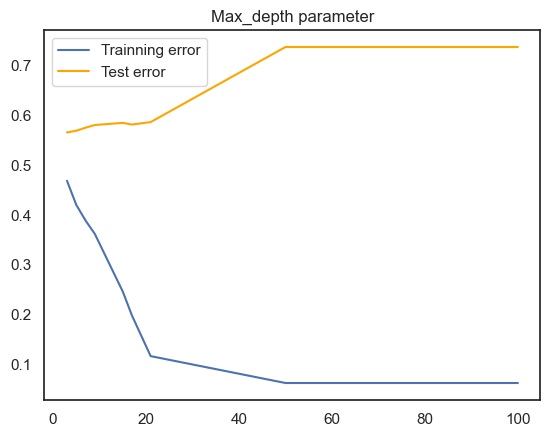

In [65]:
plt.title("Max_depth parameter")
plt.plot(max_depth__values, tr_losses, label="Trainning error")
plt.plot(max_depth__values, test_losses, color="orange", label="Test error")
plt.legend()

In [66]:
n_estimators__values = [50, 100, 200, 300, 400, 500, 1000]
tr_losses = np.array([])
test_losses = np.array([])

for n_estim in n_estimators__values:
    model = RandomForestClassifier(n_estimators=n_estim, random_state=42, n_jobs=-1)
    tr_loss, test_loss = train_predict_get_error(X_train_c, y_train_c, X_test_c, y_test_c, model, preprocessing)
    tr_losses = np.append(tr_losses, tr_loss)
    test_losses = np.append(test_losses, test_loss)

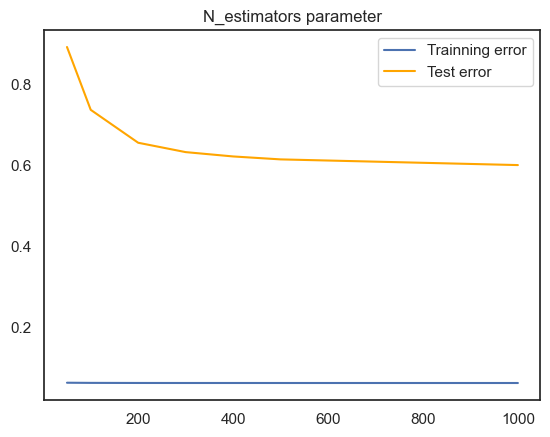

In [67]:
plt.title("N_estimators parameter")
plt.plot(n_estimators__values, tr_losses, label="Trainning error")
plt.plot(n_estimators__values, test_losses, color="orange", label="Test error")
plt.legend()

In [68]:
min_samples_split__values = [2, 5, 10, 25, 50, 100]
tr_losses = np.array([])
test_losses = np.array([])

for min_samples_split in min_samples_split__values:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42, n_jobs=-1)
    tr_loss, test_loss = train_predict_get_error(X_train_c, y_train_c, X_test_c, y_test_c, model, preprocessing)
    tr_losses = np.append(tr_losses, tr_loss)
    test_losses = np.append(test_losses, test_loss)

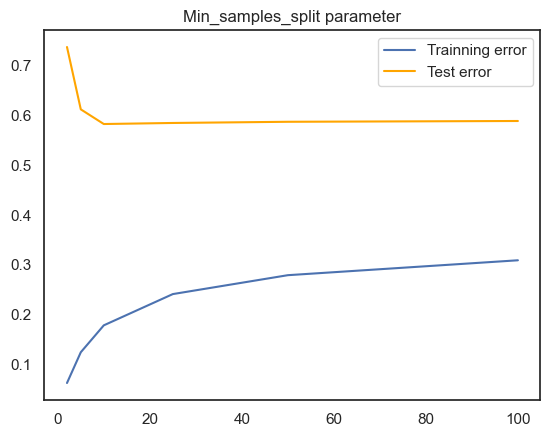

In [69]:
plt.title("Min_samples_split parameter")
plt.plot(min_samples_split__values, tr_losses, label="Trainning error")
plt.plot(min_samples_split__values, test_losses, color="orange", label="Test error")
plt.legend()

In [70]:
min_samples_leaf__values = [2, 10, 50, 100, 500, 1000, 10000]
tr_losses = np.array([])
test_losses = np.array([])

for min_samples_leaf in min_samples_leaf__values:
    model = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42, n_jobs=-1)
    tr_loss, test_loss = train_predict_get_error(X_train_c, y_train_c, X_test_c, y_test_c, model, preprocessing)
    tr_losses = np.append(tr_losses, tr_loss)
    test_losses = np.append(test_losses, test_loss)

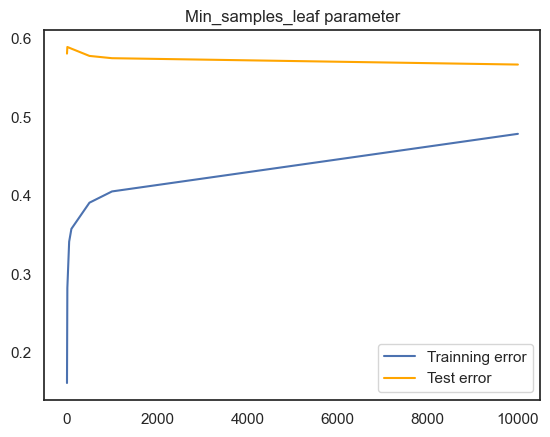

In [71]:
plt.title("Min_samples_leaf parameter")
plt.plot(min_samples_leaf__values, tr_losses, label="Trainning error")
plt.plot(min_samples_leaf__values, test_losses, color="orange", label="Test error")
plt.legend()

In [74]:
max_features_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
tr_losses = np.array([])
test_losses = np.array([])

for max_features in max_features_values:
    model = RandomForestClassifier(max_features=max_features, random_state=42, n_jobs=-1)
    tr_loss, test_loss = train_predict_get_error(X_train_c, y_train_c, X_test_c, y_test_c, model, preprocessing)
    tr_losses = np.append(tr_losses, tr_loss)
    test_losses = np.append(test_losses, test_loss)

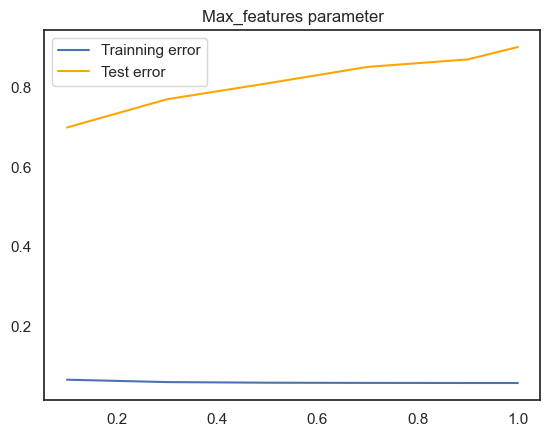

In [75]:
plt.title("Max_features parameter")
plt.plot(max_features_values, tr_losses, label="Trainning error")
plt.plot(max_features_values, test_losses, color="orange", label="Test error")
plt.legend()

In [77]:
pipe = sklearn.pipeline.make_pipeline(preprocessing, best_models["randomforest"])

hyperparameters = {
    #"selectkbest__k": [16, 17, 18, 19, 20, 21],
    "randomforestclassifier__criterion": ["gini", "log_loss"],
    "randomforestclassifier__max_depth": [5, 7, 10, 20, 50, None],
    "randomforestclassifier__n_estimators": [100, 200, 500],
    "randomforestclassifier__min_samples_leaf": [1, 10, 100, 1000],
    "randomforestclassifier__min_samples_split": [2, 5, 10, 50, 100],
    "randomforestclassifier__max_features": [0.5, 0.7, 0.9, 1.0]
}

rand_search = RandomizedSearchCV(pipe, hyperparameters, cv=kf, scoring="neg_log_loss", return_train_score=True, verbose=0, n_jobs=-1, n_iter=150, random_state=42)

best_rf_rand_search = rand_search.fit(X_train_c, y_train_c)

In [78]:
print(best_rf_rand_search.best_params_)

{'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 0.7, 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__criterion': 'log_loss'}


In [79]:
print(best_rf_rand_search.best_score_)

-0.21983094138143328


In [80]:
print(best_rf_rand_search.cv_results_)

{'mean_fit_time': array([ 55.53498068,  66.16128235, 177.57492223, 247.97445269,
       414.41918349, 102.7069859 ,  75.54631877, 294.92359452,
        85.01653171,  70.25239391, 439.82917104,  86.52634468,
       335.58810954, 306.79732718, 129.36108613, 136.15895596,
        67.87534604, 240.27777963, 111.59693179, 112.93387814,
       117.70991135,  64.8001883 ,  64.71332798, 449.78509493,
       289.1862452 , 246.59818859, 148.99112034, 180.78220043,
        71.23462677,  69.31122832, 122.5907033 , 101.52369967,
       464.18740888, 330.32918735, 292.80682592, 416.88691025,
       181.50068545, 129.90572762, 109.72083688, 438.39982142,
       282.81964078, 172.41244516, 170.44211559,  87.60706348,
       179.58837481,  96.2350101 ,  75.86555338, 172.56754465,
       184.43202028, 139.53532557, 271.90481296,  55.43165851,
       239.77360401, 171.28089981,  89.43432851, 438.7566853 ,
        73.08712173, 154.6729763 , 118.69006596,  44.6833209 ,
       143.91958737, 305.47934175, 28

In [81]:
rand_search_rf_classifier = best_rf_rand_search.best_estimator_["randomforestclassifier"]

In [82]:
pipe = sklearn.pipeline.make_pipeline(preprocessing, rand_search_rf_classifier)

hyperparameters = {
    #"selectkbest__k": [18, 19, 20],
    "randomforestclassifier__max_depth": [40, 45, 50, 55, 60],
    "randomforestclassifier__n_estimators": [150, 200, 250],
    "randomforestclassifier__min_samples_split": [2, 5, 10, 100],
    "randomforestclassifier__max_features": [0.6, 0.65, 0.7, 0.75, 0.8]
}

grid_search = GridSearchCV(pipe, hyperparameters, cv=kf, scoring="neg_log_loss", verbose=0, n_jobs=-1)

best_res_rf = grid_search.fit(X_train_c, y_train_c)

In [83]:
print(best_res_rf.best_params_)

{'randomforestclassifier__max_depth': 45, 'randomforestclassifier__max_features': 0.7, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 250}


In [84]:
print(best_res_rf.best_score_)

-0.21933002220844683


In [85]:
print(best_res_rf.best_estimator_["randomforestclassifier"])

RandomForestClassifier(criterion='log_loss', max_depth=45, max_features=0.7,
                       n_estimators=250, n_jobs=-1, random_state=42)


### BaggingClassifier - Podešavanje hyperparametara

In [76]:
n_estimators_values = [1, 5, 10, 20, 50, 100]
tr_losses = np.array([])
test_losses = np.array([])

for n_estim in n_estimators_values:
    model = BaggingClassifier(n_estimators=n_estim, random_state=42, n_jobs=-1)
    tr_loss, test_loss = train_predict_get_error(X_train_c, y_train_c, X_test_c, y_test_c, model, preprocessing)
    tr_losses = np.append(tr_losses, tr_loss)
    test_losses = np.append(test_losses, test_loss)

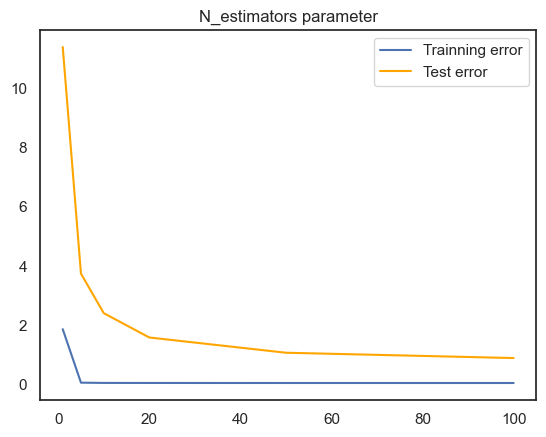

In [77]:
plt.title("N_estimators parameter")
plt.plot(n_estimators_values, tr_losses, label="Trainning error")
plt.plot(n_estimators_values, test_losses, color="orange", label="Test error")
plt.legend()

In [78]:
max_samples_values = [0.2, 0.4, 0.6, 0.8, 1.0]
tr_losses = np.array([])
test_losses = np.array([])

for max_samples in max_samples_values:
    model = BaggingClassifier(max_samples=max_samples, random_state=42, n_jobs=-1)
    tr_loss, test_loss = train_predict_get_error(X_train_c, y_train_c, X_test_c, y_test_c, model, preprocessing)
    tr_losses = np.append(tr_losses, tr_loss)
    test_losses = np.append(test_losses, test_loss)

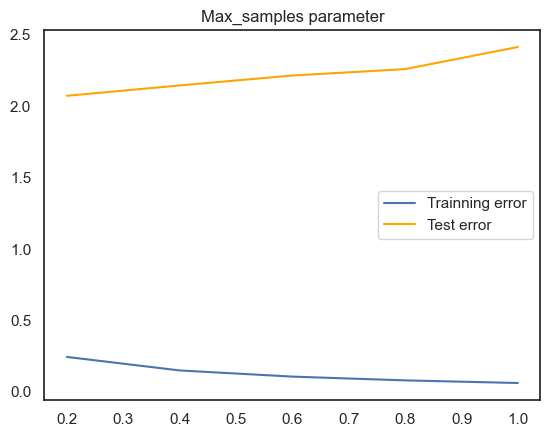

In [79]:
plt.title("Max_samples parameter")
plt.plot(max_samples_values, tr_losses, label="Trainning error")
plt.plot(max_samples_values, test_losses, color="orange", label="Test error")
plt.legend()

In [80]:
max_features_values = [0.2, 0.4, 0.6, 0.8, 1.0]
tr_losses = np.array([])
test_losses = np.array([])

for max_features in max_features_values:
    model = BaggingClassifier(max_features=max_features, random_state=42, n_jobs=-1)
    tr_loss, test_loss = train_predict_get_error(X_train_c, y_train_c, X_test_c, y_test_c, model, preprocessing)
    tr_losses = np.append(tr_losses, tr_loss)
    test_losses = np.append(test_losses, test_loss)

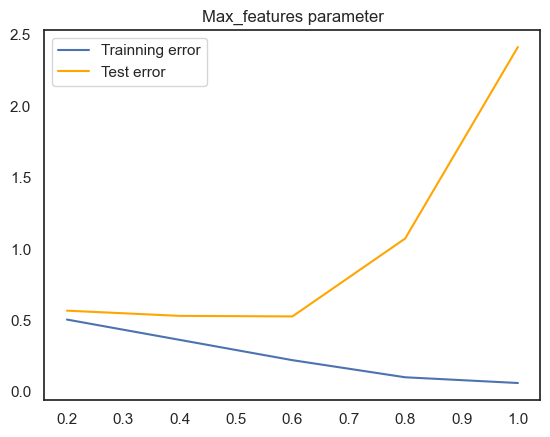

In [81]:
plt.title("Max_features parameter")
plt.plot(max_features_values, tr_losses, label="Trainning error")
plt.plot(max_features_values, test_losses, color="orange", label="Test error")
plt.legend()

In [85]:
pipe = sklearn.pipeline.make_pipeline(preprocessing, best_models["baggingc"])

hyperparameters = {
    "baggingclassifier__bootstrap": [True, False],
    "baggingclassifier__n_estimators": [5, 10, 20, 50, 100, 200],
    "baggingclassifier__max_samples": [0.2, 0.4, 0.6, 0.8, 1.0],
    "baggingclassifier__max_features": [0.2, 0.4, 0.6, 0.8, 1.0]
}

rand_search = RandomizedSearchCV(pipe, hyperparameters, cv=kf, scoring="neg_log_loss", return_train_score=True, verbose=0, n_jobs=-1, n_iter=100, random_state=42)

best_bagc_rand_search = rand_search.fit(X_train_c, y_train_c)

In [86]:
print(best_bagc_rand_search.best_params_)

{'baggingclassifier__n_estimators': 20, 'baggingclassifier__max_samples': 1.0, 'baggingclassifier__max_features': 0.8, 'baggingclassifier__bootstrap': False}


In [87]:
print(best_bagc_rand_search.best_score_)

-0.23428737655318307


In [88]:
rand_search_baggingclassifier = best_bagc_rand_search.best_estimator_["baggingclassifier"]

In [91]:
pipe = sklearn.pipeline.make_pipeline(preprocessing, rand_search_baggingclassifier)

hyperparameters = {
    "baggingclassifier__n_estimators": [180, 200, 220, 300],
    "baggingclassifier__max_samples": [0.85, 0.9, 0.95, 1.0],
    "baggingclassifier__max_features": [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(pipe, hyperparameters, cv=kf, scoring="neg_log_loss", verbose=0, n_jobs=-1)

best_res_baggingc = grid_search.fit(X_train_c, y_train_c)

In [92]:
print(best_res_baggingc.best_params_)

{'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.95, 'baggingclassifier__n_estimators': 220}


In [93]:
print(best_res_baggingc.best_score_)

-0.20682525079353384


In [94]:
print(best_res_baggingc.best_estimator_["baggingclassifier"])

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.9, max_samples=0.95, n_estimators=220,
                  n_jobs=-1, random_state=42)


### KNN - Podešavanje hyperparametara

In [67]:
n_neighbors_values = [5, 51, 101, 201, 301]
tr_losses = np.array([])
test_losses = np.array([])

for n_neighbors in n_neighbors_values:
    model = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    tr_loss, test_loss = train_predict_get_error(X_train_c, y_train_c, X_test_c, y_test_c, model, preprocessing)
    tr_losses = np.append(tr_losses, tr_loss)
    test_losses = np.append(test_losses, test_loss)

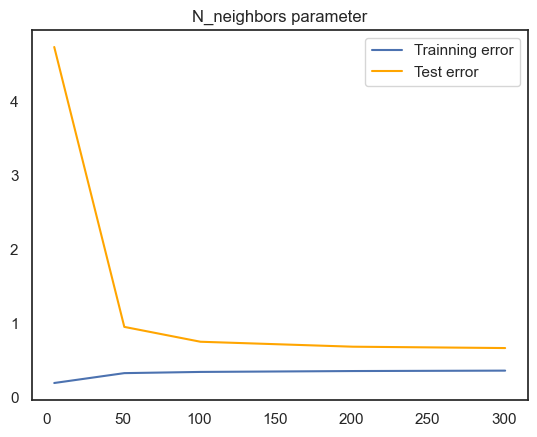

In [68]:
plt.title("N_neighbors parameter")
plt.plot(n_neighbors_values, tr_losses, label="Trainning error")
plt.plot(n_neighbors_values, test_losses, color="orange", label="Test error")
plt.legend()

Kako za KNN model nemamo puno parametara, odmah radimo **GridSearch**.

In [69]:
pipe = sklearn.pipeline.make_pipeline(preprocessing, best_models["knn"])

hyperparameters = {
    "kneighborsclassifier__n_neighbors": [5, 51, 101, 201, 301],
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "kneighborsclassifier__p": [1, 2]
}

grid_search = GridSearchCV(pipe, hyperparameters, cv=kf, scoring="neg_log_loss", verbose=0, n_jobs=-1)

best_res_knn = grid_search.fit(X_train_c, y_train_c)

In [70]:
print(best_res_knn.best_params_)

{'kneighborsclassifier__n_neighbors': 101, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}


In [73]:
print(best_res_knn.best_score_)

-0.29631511011944267


### Modeli sa optimizovanim hyperparametrima

In [62]:
""" final_models = {"best_rd": best_res_rf.best_estimator_["randomforestclassifier"],
                "best_baggingc": best_res_baggingc.best_estimator_["baggingclassifier"],
                "best_knn": best_res_knn.best_estimator_["kneighborsclassifier"]} """

# da ne bismo stalno morali da pokrecemo RandomSearch i GridSearch, koji traju jako dugo inicijalizovacemo modele "rucno"

final_models = {"best_rf": RandomForestClassifier(criterion='log_loss', max_depth=45, max_features=0.7, n_estimators=250, n_jobs=-1, random_state=42),
                "best_baggingc": BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), bootstrap=False, max_features=0.9, max_samples=0.95, n_estimators=220, n_jobs=-1, random_state=42),
                "best_knn": KNeighborsClassifier(n_jobs=-1, n_neighbors=101, p=1, weights='distance')}

## Provera performansi modela sa različitim podskupovima atributa

### Filter metoda - SelectFromModel

In [63]:
max_features = 21

In [72]:
def print_feature_sel_results(feature_sel_res, model_name):
    res_df = pd.DataFrame()
    for n_feat in feature_sel_res:
        model_performance = feature_sel_res[n_feat][model_name]
        for metric in model_performance: #["test_p", "test_r", "test_roc", "test_pr", "test_acc", "test_loss"]:
            model_performance[metric] = np.mean(model_performance[metric])
        res_df[n_feat] = model_performance
    display(res_df.T)

#### RandomForestClassifier - SelectFromModel

In [124]:
# pomocni model, koristimo ga da bismo dobili vrenosti za feature_importances_

feat_importances_model = final_models["best_rf"]
feat_importances_model.fit(X_train_c, y_train_c)

RandomForestClassifier(criterion='log_loss', max_depth=45, max_features=0.7,
                       n_estimators=250, n_jobs=-1, random_state=42)

Feature importances

In [125]:
for feature, val in sorted(zip(feat_importances_model.feature_names_in_, feat_importances_model.feature_importances_), key=lambda x: x[1], reverse=True):
    print(f"{feature} : {val}")

BMI : 0.2045628721577962
GenHlth : 0.16742616417925948
Age : 0.14097616932406876
HighBP : 0.08104855190670197
Income : 0.07285736893914109
PhysHlth : 0.05657378319149991
Education : 0.04680347827573588
MentHlth : 0.045441520609791695
Smoker : 0.023514262926307445
Sex : 0.0231442213940067
HighChol : 0.02311932539457793
Fruits : 0.023004898061443794
PhysActivity : 0.020681822421611575
Veggies : 0.018637826871285287
DiffWalk : 0.010780381689336009
HvyAlcoholConsump : 0.009843438085814591
HeartDiseaseorAttack : 0.008935932806651795
NoDocbcCost : 0.0072763694153530865
AnyHealthcare : 0.006077704156480592
CholCheck : 0.0046829593233805224
Stroke : 0.0046109488697555715


In [126]:
feature_sel_res = dict()

for i in range(15, max_features + 1):
    feature_selector = SelectFromModel(estimator=feat_importances_model, prefit=True, max_features=i, threshold=-np.inf).set_output(transform="pandas")
    X_train_subset = feature_selector.fit_transform(X_train_c, y_train_c)
    print(i, X_train_subset.columns)
    feature_sel_res[i] = run_cv({"best_rf": final_models["best_rf"]}, X_train_subset, y_train_c, kf, scoring, preprocessing, return_train_score=False)

15 Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')
16 Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')
17 Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
18 Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')
19 Index(['HighBP', 'HighChol', 

In [128]:
for n_feat in feature_sel_res:
    print(n_feat, feature_sel_res[n_feat])

15 {'best_rf': {'fit_time': array([48.56400394, 48.67100406, 48.60500765, 48.6620028 , 49.36300564]), 'score_time': array([1.21400595, 1.65200615, 1.72100258, 1.26100159, 1.14499235]), 'test_p': array([0.89681012, 0.89600438, 0.8962806 , 0.89870379, 0.90439508]), 'test_r': array([0.91969825, 0.92322876, 0.92421038, 0.92385787, 0.92703046]), 'test_roc': array([0.97389517, 0.97418326, 0.97468871, 0.97441872, 0.9753757 ]), 'test_pr': array([0.96922864, 0.96829241, 0.96906011, 0.96861273, 0.97032657]), 'test_acc': array([0.91617983, 0.91716408, 0.91770122, 0.91881251, 0.92300365]), 'test_loss': array([-0.22447724, -0.21931808, -0.22780487, -0.22302979, -0.22222239])}}
16 {'best_rf': {'fit_time': array([51.70184755, 51.97084522, 51.98484564, 51.81784892, 51.94585085]), 'score_time': array([1.32899952, 1.54099822, 1.70199108, 1.6399951 , 1.57299399]), 'test_p': array([0.89759989, 0.89795638, 0.89687543, 0.90090709, 0.90370065]), 'test_r': array([0.92019177, 0.92308777, 0.92280034, 0.92428088

In [131]:
print_feature_sel_results(feature_sel_res, "best_rf")

,fit_time,score_time,test_p,test_r,test_roc,test_pr,test_acc,test_loss
15,48.773,1.399,0.898,0.924,0.975,0.969,0.919,-0.223
16,51.884,1.557,0.899,0.923,0.975,0.970,0.919,-0.222
17,52.193,1.594,0.899,0.924,0.975,0.969,0.919,-0.222
18,37.334,1.464,0.899,0.924,0.975,0.970,0.919,-0.220
19,58.831,1.406,0.900,0.924,0.975,0.970,0.919,-0.221
20,62.436,1.272,0.900,0.925,0.975,0.970,0.920,-0.218
21,61.877,1.762,0.898,0.925,0.975,0.970,0.919,-0.221


Interesantno je da za manji broj atributa, RandomForestClassifier i dalje daje dobre rezultate. Takođe, možemo da primetimo da bolje rezultate dobijamo sa 18 atributa nego sa 21, jer je postojao **overfitting**!

#### BaggingClassifier - SelectFromModel

In [164]:
# pomocni model, koristimo ga da bismo dobili vrenosti za feature_importances_

feat_importances_model = final_models["best_baggingc"]
feat_importances_model.fit(X_train_c, y_train_c)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.9, max_samples=0.95, n_estimators=220,
                  n_jobs=-1, random_state=42)

In [133]:
feature_importances_ = np.mean([d_tree.feature_importances_ for d_tree in feat_importances_model.estimators_], axis=0)

In [134]:
for feature, val in sorted(zip(feat_importances_model.feature_names_in_, feature_importances_), key=lambda x: x[1], reverse=True):
    print(f"{feature} : {val}")

DiffWalk : 0.0614890160309687
Veggies : 0.06077461917823299
HighBP : 0.06053075388781121
PhysActivity : 0.059843220274399665
MentHlth : 0.05946611366098228
PhysHlth : 0.05746409673725004
BMI : 0.05679967044277467
HvyAlcoholConsump : 0.056773723744478116
Smoker : 0.05670745393770159
Fruits : 0.05485846131302115
Sex : 0.05464784778233822
CholCheck : 0.0543865788699248
NoDocbcCost : 0.05368849388547464
Stroke : 0.053042383122183456
HighChol : 0.05282101077581657
GenHlth : 0.04967892216465821
AnyHealthcare : 0.049556152702065634
HeartDiseaseorAttack : 0.047471481489918185


In [150]:
feature_names_sorted = [feature_name for feature_name, _ in sorted(zip(feat_importances_model.feature_names_in_, feature_importances_), key=lambda x: x[1], reverse=True)]
print(feature_names_sorted)

['DiffWalk', 'Veggies', 'HighBP', 'PhysActivity', 'MentHlth', 'PhysHlth', 'BMI', 'HvyAlcoholConsump', 'Smoker', 'Fruits', 'Sex', 'CholCheck', 'NoDocbcCost', 'Stroke', 'HighChol', 'GenHlth', 'AnyHealthcare', 'HeartDiseaseorAttack']


In [170]:
feature_sel_res = dict()

for i in range(17, len(feature_names_sorted) + 1):
    #feature_selector = SelectFromModel(estimator=feat_importances_model, prefit=True, max_features=i, threshold=-np.inf).set_output(transform="pandas")
    #X_train_subset = feature_selector.fit_transform(X_train_c, y_train_c)

    X_train_subset = X_train_c[feature_names_sorted[:i]]
    print(i, X_train_subset.columns)
    feature_sel_res[i] = run_cv({"best_baggingc": final_models["best_baggingc"]}, X_train_subset, y_train_c, kf, scoring, preprocessing, return_train_score=False)

#nad svim kolonama
feature_sel_res[21] = run_cv({"best_baggingc": final_models["best_baggingc"]}, X_train_c, y_train_c, kf, scoring, preprocessing, return_train_score=False)

17 Index(['DiffWalk', 'Veggies', 'HighBP', 'PhysActivity', 'MentHlth', 'PhysHlth',
       'BMI', 'HvyAlcoholConsump', 'Smoker', 'Fruits', 'Sex', 'CholCheck',
       'NoDocbcCost', 'Stroke', 'HighChol', 'GenHlth', 'AnyHealthcare'],
      dtype='object')
18 Index(['DiffWalk', 'Veggies', 'HighBP', 'PhysActivity', 'MentHlth', 'PhysHlth',
       'BMI', 'HvyAlcoholConsump', 'Smoker', 'Fruits', 'Sex', 'CholCheck',
       'NoDocbcCost', 'Stroke', 'HighChol', 'GenHlth', 'AnyHealthcare',
       'HeartDiseaseorAttack'],
      dtype='object')


In [171]:
for n_feat in feature_sel_res:
    print(n_feat, feature_sel_res[n_feat])

17 {'best_baggingc': {'fit_time': array([90.71556187, 91.21256399, 91.09956217, 92.29057908, 90.90156555]), 'score_time': array([3.63700533, 4.21199989, 4.42800403, 3.51098156, 3.73800087]), 'test_p': array([0.85925819, 0.86351744, 0.86144273, 0.85990929, 0.85909221]), 'test_r': array([0.8427806 , 0.8376454 , 0.8393965 , 0.84214608, 0.84334461]), 'test_roc': array([0.94197781, 0.94379558, 0.94378915, 0.94199609, 0.94196267]), 'test_pr': array([0.93487957, 0.93587273, 0.93635805, 0.93391218, 0.93561081]), 'test_acc': array([0.86703073, 0.86725298, 0.86686776, 0.86712177, 0.86715352]), 'test_loss': array([-0.30706613, -0.30385831, -0.30284091, -0.3089233 , -0.30835981])}}
18 {'best_baggingc': {'fit_time': array([96.28474212, 96.63374233, 96.31774163, 96.35673952, 95.99174142]), 'score_time': array([4.64901495, 4.74299312, 4.77199745, 5.02299595, 4.21600056]), 'test_p': array([0.85767522, 0.86120353, 0.85905557, 0.85840011, 0.85689766]), 'test_r': array([0.84376763, 0.83940783, 0.84137056

In [172]:
print_feature_sel_results(feature_sel_res, "best_baggingc")

,fit_time,score_time,test_p,test_r,test_roc,test_pr,test_acc,test_loss
17,91.244,3.905,0.861,0.841,0.943,0.935,0.867,-0.306
18,96.317,4.681,0.859,0.843,0.943,0.935,0.867,-0.305
21,119.608,4.611,0.915,0.924,0.979,0.977,0.927,-0.207


Da bi BaggingClassifier radio dobro, očigledno su nam potrebni svi atributi.

### KNN - selekcija atributa

Kako **KNNClassifier** nema atribut *feature_importances_* koristićemo Lasso (L1) regularizaciju za selekciju atributa u ovom slučaju.

In [64]:
logreg_lasso = LogisticRegression(C=0.1, solver="liblinear", penalty="l1", random_state=42)
logreg_lasso.fit(X_train_c, y_train_c)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [69]:
feature_sel_res = dict()

for i in range(15, max_features + 1):
    feature_selector = SelectFromModel(estimator=logreg_lasso, prefit=True, max_features=i, threshold=-np.inf).set_output(transform="pandas")
    X_train_subset = feature_selector.fit_transform(X_train_c, y_train_c)
    print(i, X_train_subset.columns)
    feature_sel_res[i] = run_cv({"best_knn": final_models["best_knn"]}, X_train_subset, y_train_c, kf, scoring, preprocessing, return_train_score=False)

15 Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
       'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Age', 'Education'],
      dtype='object')
16 Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
       'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')
17 Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Age',
       'Education', 'Income'],
      dtype='object')
18 Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='obje

In [73]:
print_feature_sel_results(feature_sel_res, "best_knn")

,fit_time,score_time,test_p,test_r,test_roc,test_pr,test_acc,test_loss
15,1.977,39.480,0.790,0.783,0.876,0.822,0.808,-1.623
16,0.078,84.905,0.809,0.793,0.884,0.836,0.822,-1.862
17,0.092,89.571,0.826,0.896,0.938,0.914,0.868,-0.705
18,0.068,93.403,0.828,0.901,0.943,0.925,0.871,-0.569
19,0.086,98.080,0.828,0.901,0.944,0.927,0.871,-0.540
20,0.092,100.512,0.826,0.912,0.952,0.942,0.874,-0.382
21,0.089,106.444,0.826,0.915,0.956,0.950,0.875,-0.296


Na osnovu rezultata vidimo da za KNN model ne možemo da priuštimo brisanje atributa.

### Filter metoda - SelectKBest

In [89]:
feature_sel_res = dict()
model_res = dict()

for i in range(17, max_features + 1):
    feature_selector = SelectKBest(mutual_info_classif, k=i).set_output(transform="pandas")
    X_train_subset = feature_selector.fit_transform(X_train_c, y_train_c)
    print(i, X_train_subset.columns)
    for f_model in final_models:
        model_res[f_model] = run_cv({f_model: final_models[f_model]}, X_train_subset, y_train_c, kf, scoring, preprocessing, return_train_score=False)
    feature_sel_res[i] = model_res

17 Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age',
       'Education', 'Income'],
      dtype='object')
18 Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income'],
      dtype='object')
19 Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')
20 Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholCo

In [92]:
for n_f in feature_sel_res:
    print(feature_sel_res[n_f])

{'best_rf': {'best_rf': {'fit_time': array([37.55017138, 56.2133615 , 55.40735936, 55.97835159, 26.01622534]), 'score_time': array([ 0.48800039,  5.12899494,  5.104002  ,  4.43900561, 28.95812893]), 'test_p': array([0.89700336, 0.89715028, 0.89780822, 0.8988564 , 0.90147614]), 'test_r': array([0.92223632, 0.92548467, 0.92413988, 0.92540891, 0.92569092]), 'test_roc': array([0.97473553, 0.97508532, 0.97485885, 0.97496909, 0.97578666]), 'test_pr': array([0.96989249, 0.96939921, 0.96938277, 0.96927238, 0.97088814]), 'test_acc': array([0.91729108, 0.91865634, 0.91846325, 0.91951103, 0.92097158]), 'test_loss': array([-0.21801972, -0.22020951, -0.22211985, -0.22395836, -0.21884364])}}, 'best_baggingc': {'best_baggingc': {'fit_time': array([119.33269644,  54.83074689, 123.53569269, 123.23268652,
       122.5366888 ]), 'score_time': array([ 2.44999409, 34.66116095,  2.56699634,  2.44300222,  1.86900401]), 'test_p': array([0.91572994, 0.91556268, 0.9145627 , 0.91973315, 0.92021912]), 'test_r': a

In [125]:
def print_select_kbest_res(feature_sel_res):
    res_df = pd.DataFrame(columns=["n_feat", "model", "test_p", "test_r", "test_roc", "test_pr", "test_acc", "test_loss"])
    for n_feat in feature_sel_res:
        for model in feature_sel_res[n_feat]:
            model_performance = feature_sel_res[n_feat][model][model]
            new_row = {"n_feat": n_feat, "model": model, "test_p": np.mean(model_performance["test_p"]), "test_r": np.mean(model_performance["test_r"]), "test_roc": np.mean(model_performance["test_roc"]),
                       "test_pr": np.mean(model_performance["test_pr"]), "test_acc": np.mean(model_performance["test_acc"]),  "test_loss": np.mean(model_performance["test_loss"])}
            res_df = pd.concat([res_df, pd.DataFrame([new_row])], ignore_index=True)
    display(res_df.sort_values("model"))

In [126]:
print_select_kbest_res(feature_sel_res)

,n_feat,model,test_p,test_r,test_roc,test_pr,test_acc,test_loss
1,17,best_baggingc,0.917,0.924,0.980,0.977,0.928,-0.208
4,18,best_baggingc,0.917,0.924,0.980,0.977,0.928,-0.208
7,19,best_baggingc,0.917,0.924,0.980,0.977,0.928,-0.208
10,20,best_baggingc,0.917,0.924,0.980,0.977,0.928,-0.208
13,21,best_baggingc,0.917,0.924,0.980,0.977,0.928,-0.208
2,17,best_knn,0.826,0.915,0.956,0.950,0.875,-0.296
5,18,best_knn,0.826,0.915,0.956,0.950,0.875,-0.296
8,19,best_knn,0.826,0.915,0.956,0.950,0.875,-0.296
11,20,best_knn,0.826,0.915,0.956,0.950,0.875,-0.296
14,21,best_knn,0.826,0.915,0.956,0.950,0.875,-0.296


### Brisanje manje bitnih atributa na osnovu analize sa početka

In [127]:
X_train_subset = X_train_c.drop(["Fruits", "Veggies", "Sex", "AnyHealthcare"], axis=1)
print(X_train_subset.columns)
for f_model in final_models:
    feature_sel_res[f_model] = run_cv({f_model: final_models[f_model]}, X_train_subset, y_train_c, kf, scoring, preprocessing, return_train_score=False)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age',
       'Education', 'Income'],
      dtype='object')


In [129]:
for model in feature_sel_res:
    print(feature_sel_res[model])

{'best_rf': {'best_rf': {'fit_time': array([37.55017138, 56.2133615 , 55.40735936, 55.97835159, 26.01622534]), 'score_time': array([ 0.48800039,  5.12899494,  5.104002  ,  4.43900561, 28.95812893]), 'test_p': array([0.89700336, 0.89715028, 0.89780822, 0.8988564 , 0.90147614]), 'test_r': array([0.92223632, 0.92548467, 0.92413988, 0.92540891, 0.92569092]), 'test_roc': array([0.97473553, 0.97508532, 0.97485885, 0.97496909, 0.97578666]), 'test_pr': array([0.96989249, 0.96939921, 0.96938277, 0.96927238, 0.97088814]), 'test_acc': array([0.91729108, 0.91865634, 0.91846325, 0.91951103, 0.92097158]), 'test_loss': array([-0.21801972, -0.22020951, -0.22211985, -0.22395836, -0.21884364])}}, 'best_baggingc': {'best_baggingc': {'fit_time': array([119.33269644,  54.83074689, 123.53569269, 123.23268652,
       122.5366888 ]), 'score_time': array([ 2.44999409, 34.66116095,  2.56699634,  2.44300222,  1.86900401]), 'test_p': array([0.91572994, 0.91556268, 0.9145627 , 0.91973315, 0.92021912]), 'test_r': a

Najbolji rezultati se dobijaju za 16-20 atributa korišćenjem **SelectFromModel** metode.

## Procena modela na test setu

In [61]:
X_test_c, y_test_c = X_test.copy(deep=True), y_test.copy(deep=True)

#X_test_c, y_test_c = resample_data(X_test_c, y_test_c, oversampler=SMOTEENN(sampling_strategy=0.5, random_state=42, n_jobs=-1))

X_train_final = X_train_c[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']]
y_train_final = y_train_c


X_test_final = X_test_c[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']]
y_test_final = y_test_c


X_train_final = preprocessing.fit_transform(X_train_final)
X_test_final = preprocessing.transform(X_test_final)

In [134]:
print(X_train_final.shape)
print(X_train_final)

(157477, 16)
[[ 0.33772234 -0.34233283 -1.62676177 ...  0.          1.
   0.        ]
 [-0.59342656 -0.34233283 -0.64811449 ...  0.          1.
   0.        ]
 [ 0.33772234 -0.54979573  0.00431703 ...  0.          1.
   0.        ]
 ...
 [-1.52457545 -0.54979573  0.33053279 ...  0.          1.
   0.        ]
 [ 1.26887123  2.56214782 -0.64811449 ...  0.          1.
   1.        ]
 [-0.59342656 -0.54979573  0.00431703 ...  0.          1.
   0.        ]]


In [135]:
print(X_test_final.shape)
print(X_test_final)

(35022, 16)
[[-0.59342656 -0.54979573  1.63539583 ...  0.          1.
   0.        ]
 [-1.52457545 -0.54979573  1.63539583 ...  0.          0.
   0.        ]
 [-0.59342656 -0.54979573  0.33053279 ...  0.          1.
   0.        ]
 ...
 [ 0.33772234 -0.54979573  0.65674855 ...  0.          1.
   1.        ]
 [ 0.33772234 -0.54979573 -0.97433025 ...  0.          1.
   0.        ]
 [ 0.33772234 -0.54979573  0.00431703 ...  0.          1.
   0.        ]]


In [62]:
model.fit(X_train_final, y_train_final)
y_pred_tr = model.predict(X_train_final)
y_pred = model.predict(X_test_final)

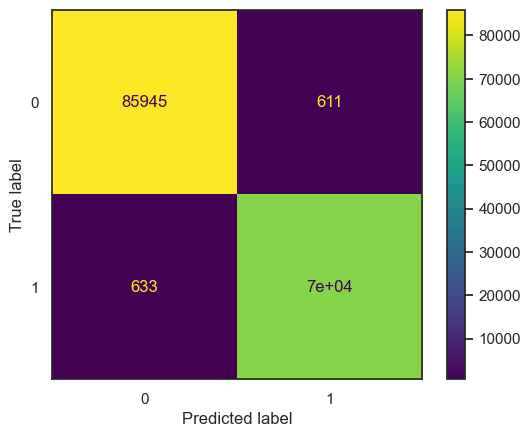

In [141]:
confusion_matrix = metrics.confusion_matrix(y_train_c, y_pred_tr)
conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
sns.set_style("white")
conf_mat_display.plot()

In [143]:
print(metrics.classification_report(y_test_c, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9162    0.7215    0.8073     38011
           1     0.3389    0.6839    0.4532      7932

    accuracy                         0.7150     45943
   macro avg     0.6275    0.7027    0.6302     45943
weighted avg     0.8166    0.7150    0.7462     45943



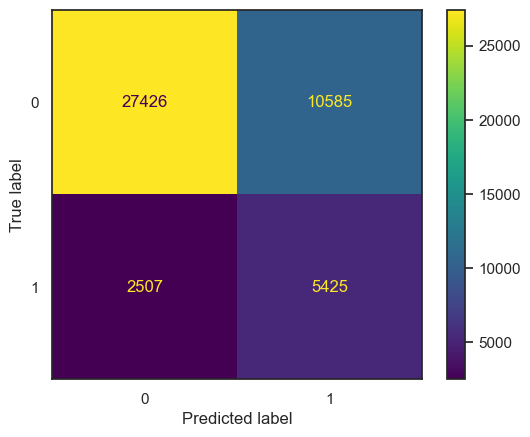

In [142]:
confusion_matrix = metrics.confusion_matrix(y_test_c, y_pred)
conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
sns.set_style("white")
conf_mat_display.plot()

In [63]:
print(metrics.roc_auc_score(y_test_final, y_pred))

0.7027332278989813


## Ostali pokusaji

In [ ]:
resampler = SMOTEENN(sampling_strategy=0.8, n_jobs=-1)

In [ ]:
results_resampled = run_cv(candidate_models, X_train, y_train, kf, scoring, resampler, preprocessing, resampled=True)

In [ ]:
print_results(results_resampled)

In [ ]:
categorical = list(X_train.select_dtypes(include=["int8"]).columns)

undersampler = RandomUnderSampler(sampling_strategy=0.4, random_state=42)
oversampler = SMOTENC(sampling_strategy=0.5, random_state=42, categorical_features=categorical)

In [ ]:
results_resampled2 = run_cv(candidate_models, X_train, y_train, kf, scoring, undersampler, oversampler, preprocessing, resampled=True)

In [ ]:
print(results_resampled2)

Vidimo da i ovi rezultati nisu tako dobri.

Kako nam resampling nije dao dobre rezultate, vratićemo se na prvobitne rezultate. Možemo da primetimo da, iako su rezultati cross-validacije loši, rezultati nad trening setom su bili jako dobri za ***DecisionTree***, ***BaggingClassifier*** i ***RandomForest*** modele. Za dalji rad ćemo izabrati dva od ova tri algoritma i probati da rešimo ovaj problem ***overfittinga***.

In [ ]:
results_preproc = run_cv(candidate_models, X_train, y_train, kf, scoring, preprocessing, resampled=False)

In [ ]:
print_results(results_preproc)

Biramo modele ***DecisionTree*** i ***RandomForestClassifier***

In [ ]:
b_models = {
    "dree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "randomforest": RandomForestClassifier(random_state=42, n_jobs=-1)
}

In [ ]:
best = best_res.best_estimator_
X_train_c = X_train.copy(deep=True)
y_train_c = y_train.copy(deep=True)
X_test_c = X_test.copy(deep=True)

best.fit(X_train_c, y_train_c)
y_pp = best.predict(X_test_c)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pp)
conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
sns.set_style("white")
conf_mat_display.plot()

In [ ]:
knn = candidate_models["knn"]
gboost = candidate_models["gboost"]

knn.fit(X_train, y_train)
y_p = knn.predict(X_test)

In [ ]:
pr, rec, fscore, _ = sklearn.metrics.precision_recall_fscore_support(y_test, y_p)

In [ ]:
print(pr, rec, fscore)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
sns.set_style("white")
conf_mat_display.plot()